In [1]:
import pandas as pd
import numpy as np

def compute_rsi(series, period=14):
    delta = series.diff()

    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # Exponential Moving Average (lebih halus daripada SMA)
    roll_up = pd.Series(gain).ewm(span=period, adjust=False).mean()
    roll_down = pd.Series(loss).ewm(span=period, adjust=False).mean()

    rs = roll_up / roll_down
    rsi = 100 - (100 / (1 + rs))

    return rsi

def compute_tech_var(df, target_cols, lags=[1,3], mas=[3,6], rsi_period=14):
    df = df.copy()

    for col in target_cols:
        # Lag features
        for lag in lags:
            df[f"{col}_lag{lag}"] = df[col].shift(lag)

        # Moving averages
        for ma in mas:
            df[f"{col}_ma{ma}"] = df[col].rolling(window=ma).mean()

        # MoM Growth
        df[f"{col}_mom_growth"] = df[col].pct_change()

        # Rolling Volatility
        for ma in mas:
            df[f"{col}_vol{ma}"] = df[col].rolling(window=ma).std()

        # Market Share
        df[f"{col}_share"] = df[col] / df[target_cols].sum(axis=1)

        # RSI
        df[f"{col}_rsi{rsi_period}"] = compute_rsi(df[col], period=rsi_period)

    return df


In [2]:
%ls

arimax-Copy1.ipynb  BBRI_Computed.csv  sarimax.ipynb
arimax.ipynb        merged_data.csv    Untitled.ipynb


In [3]:
data_link = {
    "kurs": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/kurs.csv",
    "inflasi": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/inflasi.csv",
    "bi_rate": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/bi_rate_data.csv",
    "data_eksternal": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/data_eksternal_lengkap.csv",
    "dataset_utama": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/dataCarSale2021-2025.csv",
}

In [4]:
import numpy as np
import torch
import random


SEED = 404
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

In [5]:
dataframes = {}
for name, link in data_link.items():
    # Correct the raw link for direct download
    raw_link = link.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    try:
        dataframes[name] = pd.read_csv(raw_link)
        print(f"Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"Error loading '{name}' data: {e}")

# Display the first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\n--- {name} Data ---")
    display(df.tail(20))

Successfully loaded 'kurs' data.
Successfully loaded 'inflasi' data.
Successfully loaded 'bi_rate' data.
Successfully loaded 'data_eksternal' data.
Successfully loaded 'dataset_utama' data.

--- kurs Data ---


jpy   usd     tanggal
3792   10464  9412  2010-01-29
3793   10469  9455  2010-01-28
3794   10551  9427  2010-01-27
3795   10363  9362  2010-01-26
3796   10411  9387  2010-01-25
3797   10482  9435  2010-01-22
3798   10238  9366  2010-01-21
3799   10227  9321  2010-01-20
3800   10232  9271  2010-01-19
3801   10224  9276  2010-01-18
3802   10165  9251  2010-01-15
3803   10061  9196  2010-01-14
3804   10137  9226  2010-01-13
3805   10009  9231  2010-01-12
3806  9932,9  9176  2010-01-11
3807  9958,2  9286  2010-01-08
3808   10054  9274  2010-01-07
3809   10183  9355  2010-01-06
3810   10142  9355  2010-01-05
3811   10098  9377  2010-01-04


--- inflasi Data ---


date  inflasi
167  2011-08-01     4.79
168  2011-07-01     4.61
169  2011-06-01     5.54
170  2011-05-01     5.98
171  2011-04-01     6.16
172  2011-03-01     6.65
173  2011-02-01     6.84
174  2011-01-01     7.02
175  2010-12-01     6.96
176  2010-11-01     6.33
177  2010-10-01     5.67
178  2010-09-01     5.80
179  2010-08-01     6.44
180  2010-07-01     6.22
181  2010-06-01     5.05
182  2010-05-01     4.16
183  2010-04-01     3.91
184  2010-03-01     3.43
185  2010-02-01     3.81
186  2010-01-01     3.72


--- bi_rate Data ---


Tanggal BI Rate
172   01/5/2024    6.25
173   01/6/2024    6.25
174   01/7/2024    6.25
175   01/8/2024    6.25
176   01/9/2024       6
177  01/10/2024       6
178  01/11/2024       6
179  01/12/2024       6
180   01/1/2025    5.75
181   01/2/2025    5.75
182   01/3/2025    5.75
183   01/4/2025    5.75
184   01/5/2025     5.5
185   01/6/2025     5.5
186   01/7/2025    5.25
187   01/8/2025       -
188   01/9/2025       -
189  01/10/2025       -
190  01/11/2025       -
191  01/12/2025       -


--- data_eksternal Data ---


waktu  DAIHATSU    HONDA  MITSUBISHI   SUZUKI   TOYOTA
112  2019-05-01   14178.0  11048.0     11761.0   8775.0  29103.0
113  2019-06-01    6020.0   7563.0     11968.0   7236.0  18541.0
114  2019-07-01   13013.0  13894.0     14600.0   8172.0  29362.0
115  2019-08-01   15415.0  11909.0     14240.0   8622.0  28929.0
116  2019-09-01   17537.0  12431.0     12712.0   8118.0  31831.0
117  2019-10-01   17530.0  14503.0     13983.0   8721.0  30944.0
118  2019-11-01   15911.0  13210.0     11974.0  10077.0  28970.0
119  2019-12-01   10855.0  12305.0     13327.0  10116.0  27453.0
120  2020-01-01   14173.0  12777.0     12295.0  10512.0  24119.0
121  2020-02-01   15778.0  11373.0     10903.0   8613.0  25053.0
122  2020-03-01   18162.0  12068.0     10359.0   5085.0  26191.0
123  2020-04-01    1330.0   1183.0      1113.0   1042.0   2053.0
124  2020-05-01       0.0    101.0       919.0    779.0    695.0
125  2020-06-01     331.0   1267.0      2404.0   2755.0   3705.0
126  2020-07-01    1553.0   2016.0      4690.0   6369.0   7224.0
127  2020-08-01    6651.0   3047.0      4867.0   3501.0   8673.0
128  2020-09-01   11204.0   5856.0      6630.0   6246.0  13150.0
129  2020-10-01    8289.0   7732.0      7118.0   5143.0  16345.0
130  2020-11-01    6772.0   8448.0      8743.0   8217.0  15361.0
131  2020-12-01    6481.0   7447.0      9224.0   7868.0  18687.0


--- dataset_utama Data ---


waktu  DAIHATSU      HONDA  MITSUBISHI    SUZUKI     TOYOTA
34  11/1/2023  7466.000  10307.000    6600.000  6602.000  24622.000
35   1/1/2024  7348.196   3222.119    5076.613  3242.000  10366.353
36   2/1/2024  6021.329   3829.318    4349.666  2999.000  10770.845
37   3/1/2024  6591.920   5212.549    4708.298  3503.000  12301.583
38   4/1/2024  7510.349   3435.000    4898.000  2555.000   9116.144
39   5/1/2024  9336.778   5055.000    5522.211  2736.000   9445.956
40   6/1/2024  7717.478   2875.069    4931.160  2198.000  10798.472
41   7/1/2024  7908.271   3703.054    5335.011  2557.000  13457.905
42   8/1/2024  7984.985   3574.084    6498.000  2582.000  11031.562
43   9/1/2024  7941.067   4418.000    6685.000  2677.000   9911.210
44  10/1/2024  7210.293   4317.616    6064.000  2773.000  10008.012
45  11/1/2024  7145.146   2824.359    6494.000  2943.000  11404.092
46  12/1/2024  7222.224   1831.878    5499.339  3820.000  11571.896
47   1/1/2025  5755.232   3932.347    5916.224  3370.613  14236.853
48   2/1/2025  7126.837   3758.004    7707.092  3047.704  16225.180
49   3/1/2025  6371.692   2382.924    7380.000  3223.220  13711.773
50   4/1/2025  6075.811   1590.411    5197.000  2767.379  13779.300
51   5/1/2025  7537.632   3148.000    5897.000  2004.813   9313.266
52   6/1/2025  5992.367   2360.797    6501.000  3499.336   8712.383
53   7/1/2025  6354.101   4171.007    6121.000  2666.235   7617.122

In [6]:
import pandas as pd

# --- Load data kurs ---
# Pastikan sudah terisi dari dataframes['kurs']
df_kurs = dataframes['kurs'].copy()

# Bersihkan kolom jpy (ada tanda koma)
df_kurs["jpy"] = df_kurs["jpy"].astype(str).str.replace(",", ".").astype(float)
df_kurs["usd"] = df_kurs["usd"].astype(float)
df_kurs["tanggal"] = pd.to_datetime(df_kurs["tanggal"])

# Agregasi kurs per bulan (ambil rata-rata)
kurs_monthly = (
    df_kurs.groupby(df_kurs["tanggal"].dt.to_period("M"))
    [["jpy", "usd"]]
    .mean()
    .reset_index()
)
kurs_monthly["tanggal"] = kurs_monthly["tanggal"].dt.to_timestamp()

# --- Load data inflasi ---
# Pastikan sudah terisi dari dataframes['inflasi']
df_inflasi = dataframes['inflasi'].copy()
df_inflasi["date"] = pd.to_datetime(df_inflasi["date"])

# Data inflasi sudah per bulan → hanya perlu diurutkan ascending
inflasi_monthly = df_inflasi.sort_values("date").reset_index(drop=True)

# --- Cek hasil ---
print("\n=== Kurs Monthly (aggregated) ===")
print(kurs_monthly.head())

print("\n=== Inflasi Monthly (sorted ascending) ===")
print(inflasi_monthly.head())



=== Kurs Monthly (aggregated) ===
     tanggal           jpy          usd
0 2010-01-01  10220.055000  9321.950000
1 2010-02-01  10405.052632  9395.105263
2 2010-03-01  10187.445455  9219.681818
3 2010-04-01   9711.700000  9072.333333
4 2010-05-01  10020.826316  9229.157895

=== Inflasi Monthly (sorted ascending) ===
        date  inflasi
0 2010-01-01     3.72
1 2010-02-01     3.81
2 2010-03-01     3.43
3 2010-04-01     3.91
4 2010-05-01     4.16


In [7]:
dataframes['kurs'] = kurs_monthly.copy()
dataframes['inflasi'] = inflasi_monthly.copy()

In [8]:
for key in dataframes:
  display(dataframes[key].head(10))

tanggal           jpy          usd
0 2010-01-01  10220.055000  9321.950000
1 2010-02-01  10405.052632  9395.105263
2 2010-03-01  10187.445455  9219.681818
3 2010-04-01   9711.700000  9072.333333
4 2010-05-01  10020.826316  9229.157895
5 2010-06-01  10111.295455  9194.000000
6 2010-07-01  10376.954545  9094.454545
7 2010-08-01  10553.047619  9016.761905
8 2010-09-01  10688.473684  9020.842105
9 2010-10-01  10958.714286  8972.904762

date  inflasi
0 2010-01-01     3.72
1 2010-02-01     3.81
2 2010-03-01     3.43
3 2010-04-01     3.91
4 2010-05-01     4.16
5 2010-06-01     5.05
6 2010-07-01     6.22
7 2010-08-01     6.44
8 2010-09-01     5.80
9 2010-10-01     5.67

Tanggal BI Rate
0   01/1/2010     6.5
1   01/2/2010     6.5
2   01/3/2010     6.5
3   01/4/2010     6.5
4   01/5/2010     6.5
5   01/6/2010     6.5
6   01/7/2010     6.5
7   01/8/2010     6.5
8   01/9/2010     6.5
9  01/10/2010     6.5

waktu  DAIHATSU   HONDA  MITSUBISHI  SUZUKI   TOYOTA
0  2010-01-01    8302.0  3755.0      6855.0  4815.0  20798.0
1  2010-02-01    7518.0  4431.0      8246.0  4638.0  21753.0
2  2010-03-01    8084.0  5179.0      9068.0  6203.0  26222.0
3  2010-04-01    9298.0  5154.0      9560.0  6013.0  24381.0
4  2010-05-01    9485.0  4439.0      9544.0  6043.0  21024.0
5  2010-06-01   11886.0  5965.0      8875.0  6704.0  26006.0
6  2010-07-01   11524.0  6006.0      9586.0  5623.0  27737.0
7  2010-08-01    9741.0  6025.0      9310.0  6063.0  22638.0
8  2010-09-01    6652.0  3504.0      7299.0  4924.0  18413.0
9  2010-10-01   10708.0  5970.0      9407.0  7015.0  25322.0

waktu  DAIHATSU    HONDA  MITSUBISHI   SUZUKI   TOYOTA
0   1/1/2021    8993.0   7231.0      9108.0   6400.0  15474.0
1   2/1/2021    9412.0   6812.0      7567.0   4600.0  14645.0
2   3/1/2021   16770.0  11350.0     13088.0   8669.0  26034.0
3   4/1/2021   15861.0   8474.0     13820.0   8100.0  22618.0
4   5/1/2021    8310.0   5832.0     10160.0   5341.0  17361.0
5   6/1/2021   15481.0   8782.0      8277.0   8965.0  22310.0
6   7/1/2021    9284.0   9030.0     13453.0   6274.0  20950.0
7   8/1/2021   14408.0   7337.0     13720.0  10021.0  28418.0
8   9/1/2021   17529.0   3453.0     12200.0   7515.0  32596.0
9  10/1/2021   17020.0   5861.0     13109.0   7624.0  20633.0

In [9]:
# Select the two dataframes to combine
df_eksternal = dataframes['data_eksternal'].copy()
df_utama = dataframes['dataset_utama'].copy()

# Standardize date column names and convert to datetime
df_eksternal = df_eksternal.rename(columns={'waktu': 'date'})
df_eksternal['date'] = pd.to_datetime(df_eksternal['date'])

df_utama = df_utama.rename(columns={'waktu': 'date'})
df_utama['date'] = pd.to_datetime(df_utama['date'])

# Concatenate the dataframes, placing df_utama below df_eksternal
combined_df = pd.concat([df_eksternal, df_utama], ignore_index=True)

# Sort by date
combined_df = combined_df.sort_values('date').reset_index(drop=True)

print("Combined DataFrame (data_eksternal on top, dataset_utama below):")
display(combined_df.head())
display(combined_df.tail())

Combined DataFrame (data_eksternal on top, dataset_utama below):


date  DAIHATSU   HONDA  MITSUBISHI  SUZUKI   TOYOTA
0 2010-01-01    8302.0  3755.0      6855.0  4815.0  20798.0
1 2010-02-01    7518.0  4431.0      8246.0  4638.0  21753.0
2 2010-03-01    8084.0  5179.0      9068.0  6203.0  26222.0
3 2010-04-01    9298.0  5154.0      9560.0  6013.0  24381.0
4 2010-05-01    9485.0  4439.0      9544.0  6043.0  21024.0

date  DAIHATSU     HONDA  MITSUBISHI    SUZUKI     TOYOTA
181 2025-03-01  6371.692  2382.924      7380.0  3223.220  13711.773
182 2025-04-01  6075.811  1590.411      5197.0  2767.379  13779.300
183 2025-05-01  7537.632  3148.000      5897.0  2004.813   9313.266
184 2025-06-01  5992.367  2360.797      6501.0  3499.336   8712.383
185 2025-07-01  6354.101  4171.007      6121.0  2666.235   7617.122

In [10]:
# Load the original bi_rate dataframe
bi_rate_df = dataframes['bi_rate'].copy()

# Convert 'Tanggal' to datetime, specifying the original format
bi_rate_df['Tanggal'] = pd.to_datetime(bi_rate_df['Tanggal'], format='%d/%m/%Y', errors='coerce')

# Set the date to the first day of the month and format as YYYY-MM-DD
bi_rate_df['Tanggal'] = bi_rate_df['Tanggal'].dt.to_period('M').dt.to_timestamp('D') + pd.offsets.MonthBegin(0)
bi_rate_df['Tanggal'] = bi_rate_df['Tanggal'].dt.strftime('%Y-%m-%d')

# Handle potential non-numeric 'BI Rate' values by coercing to numeric
bi_rate_df['BI Rate'] = pd.to_numeric(bi_rate_df['BI Rate'], errors='coerce')

# Update the dataframe in the dataframes dictionary
dataframes['bi_rate'] = bi_rate_df

print("Processed dataframes['bi_rate'] with 'Tanggal' in YYYY-MM-DD format:")
display(dataframes['bi_rate'].head())

Processed dataframes['bi_rate'] with 'Tanggal' in YYYY-MM-DD format:


Tanggal  BI Rate
0  2010-01-01      6.5
1  2010-02-01      6.5
2  2010-03-01      6.5
3  2010-04-01      6.5
4  2010-05-01      6.5

In [11]:
kurs = dataframes['kurs'].copy()
inflasi = dataframes['inflasi'].copy()
bi_rate = dataframes['bi_rate'].copy()
data = combined_df.copy()

In [12]:
def combineDf(dfs):
  return pd.concat(dfs, ignore_index=True)

In [13]:
dfs = [kurs, inflasi, bi_rate, data]

In [14]:
# Standardize date columns and names before merging

# kurs
kurs_processed = dfs[0].copy()
kurs_processed = kurs_processed.rename(columns={'tanggal': 'date'})
# Ensure date is datetime and set to first of month if needed (assuming it's already monthly from previous steps)
kurs_processed['date'] = pd.to_datetime(kurs_processed['date'])


# inflasi
inflasi_processed = dfs[1].copy()
# Ensure date is datetime and set to first of month if needed (assuming it's already monthly from previous steps)
inflasi_processed['date'] = pd.to_datetime(inflasi_processed['date'])


# bi_rate
bi_rate_processed = dfs[2].copy()
bi_rate_processed = bi_rate_processed.rename(columns={'Tanggal': 'date'})
# Ensure date is datetime and set to first of month if needed (assuming it's already processed in 8xgidzZ0qaHj)
bi_rate_processed['date'] = pd.to_datetime(bi_rate_processed['date'])
# Handle potential duplicates after standardizing date
bi_rate_processed['BI Rate'] = pd.to_numeric(bi_rate_processed['BI Rate'], errors='coerce')
bi_rate_processed = bi_rate_processed.groupby('date')['BI Rate'].mean().reset_index()


# data (combined_df)
data_processed = dfs[3].copy()
# Ensure date is datetime and set to first of month if needed (assuming it's already processed in h7AI2EbBM80d)
data_processed['date'] = pd.to_datetime(data_processed['date'])
# Handle potential duplicates after standardizing date
# Assuming all columns except date should be averaged if dates are duplicated
numeric_cols = data_processed.select_dtypes(include=np.number).columns.tolist()
data_processed = data_processed.groupby('date')[numeric_cols].mean().reset_index()


# Merge all dataframes
merged_all_df = kurs_processed
merged_all_df = pd.merge(merged_all_df, inflasi_processed, on='date', how='outer')
merged_all_df = pd.merge(merged_all_df, bi_rate_processed, on='date', how='outer')
merged_all_df = pd.merge(merged_all_df, data_processed, on='date', how='outer')

# Sort by date
merged_all_df = merged_all_df.sort_values('date').reset_index(drop=True)

print("Merged DataFrame (all dataframes from dfs list):")
display(merged_all_df.head(10))
display(merged_all_df.tail(10))

Merged DataFrame (all dataframes from dfs list):


date           jpy          usd  inflasi  BI Rate  DAIHATSU   HONDA  \
0 2010-01-01  10220.055000  9321.950000     3.72      6.5    8302.0  3755.0   
1 2010-02-01  10405.052632  9395.105263     3.81      6.5    7518.0  4431.0   
2 2010-03-01  10187.445455  9219.681818     3.43      6.5    8084.0  5179.0   
3 2010-04-01   9711.700000  9072.333333     3.91      6.5    9298.0  5154.0   
4 2010-05-01  10020.826316  9229.157895     4.16      6.5    9485.0  4439.0   
5 2010-06-01  10111.295455  9194.000000     5.05      6.5   11886.0  5965.0   
6 2010-07-01  10376.954545  9094.454545     6.22      6.5   11524.0  6006.0   
7 2010-08-01  10553.047619  9016.761905     6.44      6.5    9741.0  6025.0   
8 2010-09-01  10688.473684  9020.842105     5.80      6.5    6652.0  3504.0   
9 2010-10-01  10958.714286  8972.904762     5.67      6.5   10708.0  5970.0   

   MITSUBISHI  SUZUKI   TOYOTA  
0      6855.0  4815.0  20798.0  
1      8246.0  4638.0  21753.0  
2      9068.0  6203.0  26222.0  
3      9560.0  6013.0  24381.0  
4      9544.0  6043.0  21024.0  
5      8875.0  6704.0  26006.0  
6      9586.0  5623.0  27737.0  
7      9310.0  6063.0  22638.0  
8      7299.0  4924.0  18413.0  
9      9407.0  7015.0  25322.0

date           jpy           usd  inflasi  BI Rate  DAIHATSU  \
182 2025-03-01  11097.894737  16538.526316     1.03     5.75  6371.692   
183 2025-04-01  11771.125000  16904.000000     1.95     5.75  6075.811   
184 2025-05-01  11455.470588  16522.823529     1.60     5.50  7537.632   
185 2025-06-01  11343.555556  16391.944444     1.87     5.50  5992.367   
186 2025-07-01  11154.869565  16357.782609     2.37     5.25  6354.101   
187 2025-08-01           NaN           NaN      NaN      NaN       NaN   
188 2025-09-01           NaN           NaN      NaN      NaN       NaN   
189 2025-10-01           NaN           NaN      NaN      NaN       NaN   
190 2025-11-01           NaN           NaN      NaN      NaN       NaN   
191 2025-12-01           NaN           NaN      NaN      NaN       NaN   

        HONDA  MITSUBISHI    SUZUKI     TOYOTA  
182  2382.924      7380.0  3223.220  13711.773  
183  1590.411      5197.0  2767.379  13779.300  
184  3148.000      5897.0  2004.813   9313.266  
185  2360.797      6501.0  3499.336   8712.383  
186  4171.007      6121.0  2666.235   7617.122  
187       NaN         NaN       NaN        NaN  
188       NaN         NaN       NaN        NaN  
189       NaN         NaN       NaN        NaN  
190       NaN         NaN       NaN        NaN  
191       NaN         NaN       NaN        NaN

In [15]:
# Save the merged dataframe to a CSV file
merged_all_df.to_csv('merged_data.csv', index=False)

print("merged_all_df saved to /tmp/merged_data.csv")

merged_all_df saved to /tmp/merged_data.csv


In [16]:
processed_df = compute_tech_var(merged_all_df, ["TOYOTA", "DAIHATSU","MITSUBISHI","HONDA","SUZUKI"])

/tmp/ipykernel_11328/2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipykernel_11328/2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipykernel_11328/2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ip

In [17]:
import pandas as pd

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# Display the head of the processed_df
display(processed_df.head())
display(processed_df.head())

date           jpy          usd  inflasi  BI Rate  DAIHATSU   HONDA  \
0 2010-01-01  10220.055000  9321.950000     3.72      6.5    8302.0  3755.0   
1 2010-02-01  10405.052632  9395.105263     3.81      6.5    7518.0  4431.0   
2 2010-03-01  10187.445455  9219.681818     3.43      6.5    8084.0  5179.0   
3 2010-04-01   9711.700000  9072.333333     3.91      6.5    9298.0  5154.0   
4 2010-05-01  10020.826316  9229.157895     4.16      6.5    9485.0  4439.0   

   MITSUBISHI  SUZUKI   TOYOTA  TOYOTA_lag1  TOYOTA_lag3    TOYOTA_ma3  \
0      6855.0  4815.0  20798.0          NaN          NaN           NaN   
1      8246.0  4638.0  21753.0      20798.0          NaN           NaN   
2      9068.0  6203.0  26222.0      21753.0          NaN  22924.333333   
3      9560.0  6013.0  24381.0      26222.0      20798.0  24118.666667   
4      9544.0  6043.0  21024.0      24381.0      21753.0  23875.666667   

   TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  TOYOTA_vol6  TOYOTA_share  \
0         NaN                NaN          NaN          NaN      0.467108   
1         NaN           0.045918          NaN          NaN      0.466943   
2         NaN           0.205443  2895.506922          NaN      0.478888   
3         NaN          -0.070208  2246.019665          NaN      0.448131   
4         NaN          -0.137689  2635.587664          NaN      0.416028   

   TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  \
0           NaN            NaN            NaN           NaN           NaN   
1    100.000000         8302.0            NaN           NaN           NaN   
2    100.000000         7518.0            NaN   7968.000000           NaN   
3     71.375015         8084.0         8302.0   8300.000000           NaN   
4     44.546204         9298.0         7518.0   8955.666667           NaN   

   DAIHATSU_mom_growth  DAIHATSU_vol3  DAIHATSU_vol6  DAIHATSU_share  \
0                  NaN            NaN            NaN        0.186457   
1            -0.094435            NaN            NaN        0.161379   
2             0.075286     404.667765            NaN        0.147637   
3             0.150173     909.445985            NaN        0.170900   
4             0.020112     760.653885            NaN        0.187692   

   DAIHATSU_rsi14  MITSUBISHI_lag1  MITSUBISHI_lag3  MITSUBISHI_ma3  \
0             NaN              NaN              NaN             NaN   
1        0.000000           6855.0              NaN             NaN   
2       45.444813           8246.0              NaN     8056.333333   
3       74.323277           9068.0           6855.0     8958.000000   
4       76.531273           9560.0           8246.0     9390.666667   

   MITSUBISHI_ma6  MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
0             NaN                    NaN              NaN              NaN   
1             NaN               0.202918              NaN              NaN   
2             NaN               0.099685      1118.625198              NaN   
3             NaN               0.054257       663.870469              NaN   
4             NaN              -0.001674       279.552023              NaN   

   MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3    HONDA_ma3  \
0          0.153958               NaN         NaN         NaN          NaN   
1          0.177006        100.000000      3755.0         NaN          NaN   
2          0.165607        100.000000      4431.0         NaN  4455.000000   
3          0.175716        100.000000      5179.0      3755.0  4921.333333   
4          0.188859         99.185876      5154.0      4431.0  4924.000000   

   HONDA_ma6  HONDA_mom_growth  HONDA_vol3  HONDA_vol6  HONDA_share  \
0        NaN               NaN         NaN         NaN     0.084335   
1        NaN          0.180027         NaN         NaN     0.095114   
2        NaN          0.168811  712.303306         NaN     0.094583   
3        NaN         -0.004827  424.825062         NaN     0.094732   
4        NaN   

date           jpy          usd  inflasi  BI Rate  DAIHATSU   HONDA  \
0 2010-01-01  10220.055000  9321.950000     3.72      6.5    8302.0  3755.0   
1 2010-02-01  10405.052632  9395.105263     3.81      6.5    7518.0  4431.0   
2 2010-03-01  10187.445455  9219.681818     3.43      6.5    8084.0  5179.0   
3 2010-04-01   9711.700000  9072.333333     3.91      6.5    9298.0  5154.0   
4 2010-05-01  10020.826316  9229.157895     4.16      6.5    9485.0  4439.0   

   MITSUBISHI  SUZUKI   TOYOTA  TOYOTA_lag1  TOYOTA_lag3    TOYOTA_ma3  \
0      6855.0  4815.0  20798.0          NaN          NaN           NaN   
1      8246.0  4638.0  21753.0      20798.0          NaN           NaN   
2      9068.0  6203.0  26222.0      21753.0          NaN  22924.333333   
3      9560.0  6013.0  24381.0      26222.0      20798.0  24118.666667   
4      9544.0  6043.0  21024.0      24381.0      21753.0  23875.666667   

   TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  TOYOTA_vol6  TOYOTA_share  \
0         NaN                NaN          NaN          NaN      0.467108   
1         NaN           0.045918          NaN          NaN      0.466943   
2         NaN           0.205443  2895.506922          NaN      0.478888   
3         NaN          -0.070208  2246.019665          NaN      0.448131   
4         NaN          -0.137689  2635.587664          NaN      0.416028   

   TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  \
0           NaN            NaN            NaN           NaN           NaN   
1    100.000000         8302.0            NaN           NaN           NaN   
2    100.000000         7518.0            NaN   7968.000000           NaN   
3     71.375015         8084.0         8302.0   8300.000000           NaN   
4     44.546204         9298.0         7518.0   8955.666667           NaN   

   DAIHATSU_mom_growth  DAIHATSU_vol3  DAIHATSU_vol6  DAIHATSU_share  \
0                  NaN            NaN            NaN        0.186457   
1            -0.094435            NaN            NaN        0.161379   
2             0.075286     404.667765            NaN        0.147637   
3             0.150173     909.445985            NaN        0.170900   
4             0.020112     760.653885            NaN        0.187692   

   DAIHATSU_rsi14  MITSUBISHI_lag1  MITSUBISHI_lag3  MITSUBISHI_ma3  \
0             NaN              NaN              NaN             NaN   
1        0.000000           6855.0              NaN             NaN   
2       45.444813           8246.0              NaN     8056.333333   
3       74.323277           9068.0           6855.0     8958.000000   
4       76.531273           9560.0           8246.0     9390.666667   

   MITSUBISHI_ma6  MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
0             NaN                    NaN              NaN              NaN   
1             NaN               0.202918              NaN              NaN   
2             NaN               0.099685      1118.625198              NaN   
3             NaN               0.054257       663.870469              NaN   
4             NaN              -0.001674       279.552023              NaN   

   MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3    HONDA_ma3  \
0          0.153958               NaN         NaN         NaN          NaN   
1          0.177006        100.000000      3755.0         NaN          NaN   
2          0.165607        100.000000      4431.0         NaN  4455.000000   
3          0.175716        100.000000      5179.0      3755.0  4921.333333   
4          0.188859         99.185876      5154.0      4431.0  4924.000000   

   HONDA_ma6  HONDA_mom_growth  HONDA_vol3  HONDA_vol6  HONDA_share  \
0        NaN               NaN         NaN         NaN     0.084335   
1        NaN          0.180027         NaN         NaN     0.095114   
2        NaN          0.168811  712.303306         NaN     0.094583   
3        NaN         -0.004827  424.825062         NaN     0.094732   
4        NaN   

In [18]:
!pip install u8darts


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [20]:
!pip install pytorch_lightning


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [101]:
df = processed_df.copy()[:-5]
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df.set_index('date',  inplace=True)
all_months = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')
# Reindexs
df = df.reindex(all_months)
df = df.interpolate(method='time', limit_direction='both')
colors = ['#00D4AA', '#FF6B9D', '#C44569', '#F8B500', '#6C5CE7']
brands = ['DAIHATSU', 'HONDA', 'MITSUBISHI', 'SUZUKI', 'TOYOTA']

<Axes: >

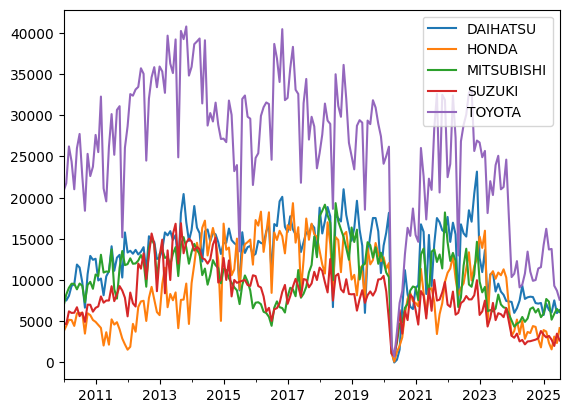

In [102]:
df[brands].plot()

In [103]:

for brand in brands:
    result = df.loc[df[brand] < 1000]
    display(result)

jpy           usd  inflasi  BI Rate  DAIHATSU   HONDA  \
2020-05-01  13982.125000  14980.812500     2.19     4.50       0.0   101.0   
2020-06-01  13267.095238  14266.952381     1.96     4.25     331.0  1267.0   

            MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3   TOYOTA_ma3  \
2020-05-01       919.0   779.0   695.0       2053.0      25053.0  9646.333333   
2020-06-01      2404.0  2755.0  3705.0        695.0      26191.0  2151.000000   

            TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3   TOYOTA_vol6  \
2020-05-01     17594.0          -0.661471  14344.181306  12620.772385   
2020-06-01     13636.0           4.330935   1507.391124  12634.313072   

            TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  \
2020-05-01      0.278669     19.242646         1330.0        15778.0   
2020-06-01      0.354139     26.022118            0.0        18162.0   

            DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  DAIHATSU_vol3  \
2020-05-01   6497.333333  10049.666667                 -1.0   10123.762212   
2020-06-01    553.666667   8295.666667                  inf     692.394637   

            DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  MITSUBISHI_lag1  \
2020-05-01    7659.015359        0.000000       29.004390           1113.0   
2020-06-01    8586.587277        0.031638       29.836432            919.0   

            MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01          10903.0     4130.333333     8152.666667   
2020-06-01          10359.0     1478.666667     6332.166667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   
2020-06-01               1.615887       807.211455      5378.398513   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   
2020-06-01          0.229784         27.209903       101.0     12068.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   
2020-06-01   850.333333  6461.500000         11.544554   650.299418   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   
2020-06-01  6176.448292     0.121105    28.329928        779.0       5085.0   

             SUZUKI_ma3   SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01  2302.000000  6024.500000          -0.252399  2413.733415   
2020-06-01  1525.333333  4797.666667           2.536585  1073.010873   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307      0.312350     20.258461  
2020-06-01  4042.774674      0.263334     33.639450

jpy         usd  inflasi  BI Rate  DAIHATSU  HONDA  \
2020-05-01  13982.125  14980.8125     2.19      4.5       0.0  101.0   

            MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3   TOYOTA_ma3  \
2020-05-01       919.0   779.0   695.0       2053.0      25053.0  9646.333333   

            TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3   TOYOTA_vol6  \
2020-05-01     17594.0          -0.661471  14344.181306  12620.772385   

            TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  \
2020-05-01      0.278669     19.242646         1330.0        15778.0   

            DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  DAIHATSU_vol3  \
2020-05-01   6497.333333  10049.666667                 -1.0   10123.762212   

            DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  MITSUBISHI_lag1  \
2020-05-01    7659.015359             0.0        29.00439           1113.0   

            MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01          10903.0     4130.333333     8152.666667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   

            SUZUKI_ma3  SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01      2302.0      6024.5          -0.252399  2413.733415   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307       0.31235     20.258461

jpy         usd  inflasi  BI Rate  DAIHATSU  HONDA  \
2020-05-01  13982.125  14980.8125     2.19      4.5       0.0  101.0   

            MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3   TOYOTA_ma3  \
2020-05-01       919.0   779.0   695.0       2053.0      25053.0  9646.333333   

            TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3   TOYOTA_vol6  \
2020-05-01     17594.0          -0.661471  14344.181306  12620.772385   

            TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  \
2020-05-01      0.278669     19.242646         1330.0        15778.0   

            DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  DAIHATSU_vol3  \
2020-05-01   6497.333333  10049.666667                 -1.0   10123.762212   

            DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  MITSUBISHI_lag1  \
2020-05-01    7659.015359             0.0        29.00439           1113.0   

            MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01          10903.0     4130.333333     8152.666667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   

            SUZUKI_ma3  SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01      2302.0      6024.5          -0.252399  2413.733415   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307       0.31235     20.258461

jpy         usd  inflasi  BI Rate  DAIHATSU  HONDA  \
2020-05-01  13982.125  14980.8125     2.19      4.5       0.0  101.0   

            MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3   TOYOTA_ma3  \
2020-05-01       919.0   779.0   695.0       2053.0      25053.0  9646.333333   

            TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3   TOYOTA_vol6  \
2020-05-01     17594.0          -0.661471  14344.181306  12620.772385   

            TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  \
2020-05-01      0.278669     19.242646         1330.0        15778.0   

            DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  DAIHATSU_vol3  \
2020-05-01   6497.333333  10049.666667                 -1.0   10123.762212   

            DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  MITSUBISHI_lag1  \
2020-05-01    7659.015359             0.0        29.00439           1113.0   

            MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01          10903.0     4130.333333     8152.666667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   

            SUZUKI_ma3  SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01      2302.0      6024.5          -0.252399  2413.733415   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307       0.31235     20.258461

jpy         usd  inflasi  BI Rate  DAIHATSU  HONDA  \
2020-05-01  13982.125  14980.8125     2.19      4.5       0.0  101.0   

            MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3   TOYOTA_ma3  \
2020-05-01       919.0   779.0   695.0       2053.0      25053.0  9646.333333   

            TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3   TOYOTA_vol6  \
2020-05-01     17594.0          -0.661471  14344.181306  12620.772385   

            TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  \
2020-05-01      0.278669     19.242646         1330.0        15778.0   

            DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  DAIHATSU_vol3  \
2020-05-01   6497.333333  10049.666667                 -1.0   10123.762212   

            DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  MITSUBISHI_lag1  \
2020-05-01    7659.015359             0.0        29.00439           1113.0   

            MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01          10903.0     4130.333333     8152.666667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   

            SUZUKI_ma3  SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01      2302.0      6024.5          -0.252399  2413.733415   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307       0.31235     20.258461

In [104]:
# Handle missing values using forward fill and then backward fill
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

# Replace 0 values with a small number to avoid issues with log transformation
df = df.replace(0, 1e-9)

/tmp/ipykernel_11328/653852351.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipykernel_11328/653852351.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [105]:

for brand in brands:
    result = df.loc[df[brand] < 1000]
    display(result)

jpy           usd  inflasi  BI Rate      DAIHATSU  \
2020-05-01  13982.125000  14980.812500     2.19     4.50  1.000000e-09   
2020-06-01  13267.095238  14266.952381     1.96     4.25  3.310000e+02   

             HONDA  MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2020-05-01   101.0       919.0   779.0   695.0       2053.0      25053.0   
2020-06-01  1267.0      2404.0  2755.0  3705.0        695.0      26191.0   

             TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3  \
2020-05-01  9646.333333     17594.0          -0.661471  14344.181306   
2020-06-01  2151.000000     13636.0           4.330935   1507.391124   

             TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2020-05-01  12620.772385      0.278669     19.242646   1.330000e+03   
2020-06-01  12634.313072      0.354139     26.022118   1.000000e-09   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2020-05-01        15778.0   6497.333333  10049.666667                 -1.0   
2020-06-01        18162.0    553.666667   8295.666667                  inf   

            DAIHATSU_vol3  DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  \
2020-05-01   10123.762212    7659.015359    1.000000e-09       29.004390   
2020-06-01     692.394637    8586.587277    3.163831e-02       29.836432   

            MITSUBISHI_lag1  MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01           1113.0          10903.0     4130.333333     8152.666667   
2020-06-01            919.0          10359.0     1478.666667     6332.166667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   
2020-06-01               1.615887       807.211455      5378.398513   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   
2020-06-01          0.229784         27.209903       101.0     12068.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   
2020-06-01   850.333333  6461.500000         11.544554   650.299418   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   
2020-06-01  6176.448292     0.121105    28.329928        779.0       5085.0   

             SUZUKI_ma3   SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01  2302.000000  6024.500000          -0.252399  2413.733415   
2020-06-01  1525.333333  4797.666667           2.536585  1073.010873   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307      0.312350     20.258461  
2020-06-01  4042.774674      0.263334     33.639450

jpy         usd  inflasi  BI Rate      DAIHATSU  HONDA  \
2020-05-01  13982.125  14980.8125     2.19      4.5  1.000000e-09  101.0   

            MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3   TOYOTA_ma3  \
2020-05-01       919.0   779.0   695.0       2053.0      25053.0  9646.333333   

            TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3   TOYOTA_vol6  \
2020-05-01     17594.0          -0.661471  14344.181306  12620.772385   

            TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  \
2020-05-01      0.278669     19.242646         1330.0        15778.0   

            DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  DAIHATSU_vol3  \
2020-05-01   6497.333333  10049.666667                 -1.0   10123.762212   

            DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  MITSUBISHI_lag1  \
2020-05-01    7659.015359    1.000000e-09        29.00439           1113.0   

            MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01          10903.0     4130.333333     8152.666667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   

            SUZUKI_ma3  SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01      2302.0      6024.5          -0.252399  2413.733415   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307       0.31235     20.258461

jpy         usd  inflasi  BI Rate      DAIHATSU  HONDA  \
2020-05-01  13982.125  14980.8125     2.19      4.5  1.000000e-09  101.0   

            MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3   TOYOTA_ma3  \
2020-05-01       919.0   779.0   695.0       2053.0      25053.0  9646.333333   

            TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3   TOYOTA_vol6  \
2020-05-01     17594.0          -0.661471  14344.181306  12620.772385   

            TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  \
2020-05-01      0.278669     19.242646         1330.0        15778.0   

            DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  DAIHATSU_vol3  \
2020-05-01   6497.333333  10049.666667                 -1.0   10123.762212   

            DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  MITSUBISHI_lag1  \
2020-05-01    7659.015359    1.000000e-09        29.00439           1113.0   

            MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01          10903.0     4130.333333     8152.666667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   

            SUZUKI_ma3  SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01      2302.0      6024.5          -0.252399  2413.733415   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307       0.31235     20.258461

jpy         usd  inflasi  BI Rate      DAIHATSU  HONDA  \
2020-05-01  13982.125  14980.8125     2.19      4.5  1.000000e-09  101.0   

            MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3   TOYOTA_ma3  \
2020-05-01       919.0   779.0   695.0       2053.0      25053.0  9646.333333   

            TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3   TOYOTA_vol6  \
2020-05-01     17594.0          -0.661471  14344.181306  12620.772385   

            TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  \
2020-05-01      0.278669     19.242646         1330.0        15778.0   

            DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  DAIHATSU_vol3  \
2020-05-01   6497.333333  10049.666667                 -1.0   10123.762212   

            DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  MITSUBISHI_lag1  \
2020-05-01    7659.015359    1.000000e-09        29.00439           1113.0   

            MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01          10903.0     4130.333333     8152.666667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   

            SUZUKI_ma3  SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01      2302.0      6024.5          -0.252399  2413.733415   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307       0.31235     20.258461

jpy         usd  inflasi  BI Rate      DAIHATSU  HONDA  \
2020-05-01  13982.125  14980.8125     2.19      4.5  1.000000e-09  101.0   

            MITSUBISHI  SUZUKI  TOYOTA  TOYOTA_lag1  TOYOTA_lag3   TOYOTA_ma3  \
2020-05-01       919.0   779.0   695.0       2053.0      25053.0  9646.333333   

            TOYOTA_ma6  TOYOTA_mom_growth   TOYOTA_vol3   TOYOTA_vol6  \
2020-05-01     17594.0          -0.661471  14344.181306  12620.772385   

            TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  DAIHATSU_lag3  \
2020-05-01      0.278669     19.242646         1330.0        15778.0   

            DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  DAIHATSU_vol3  \
2020-05-01   6497.333333  10049.666667                 -1.0   10123.762212   

            DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  MITSUBISHI_lag1  \
2020-05-01    7659.015359    1.000000e-09        29.00439           1113.0   

            MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2020-05-01          10903.0     4130.333333     8152.666667   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2020-05-01              -0.174304      5395.055638      5625.792946   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2020-05-01          0.368484         19.826209      1183.0     11373.0   

              HONDA_ma3    HONDA_ma6  HONDA_mom_growth   HONDA_vol3  \
2020-05-01  4450.666667  8301.166667         -0.914624  6618.950546   

             HONDA_vol6  HONDA_share  HONDA_rsi14  SUZUKI_lag1  SUZUKI_lag3  \
2020-05-01  5959.865583     0.040497    23.560427       1042.0       8613.0   

            SUZUKI_ma3  SUZUKI_ma6  SUZUKI_mom_growth  SUZUKI_vol3  \
2020-05-01      2302.0      6024.5          -0.252399  2413.733415   

            SUZUKI_vol6  SUZUKI_share  SUZUKI_rsi14  
2020-05-01  4400.036307       0.31235     20.258461

<Axes: >

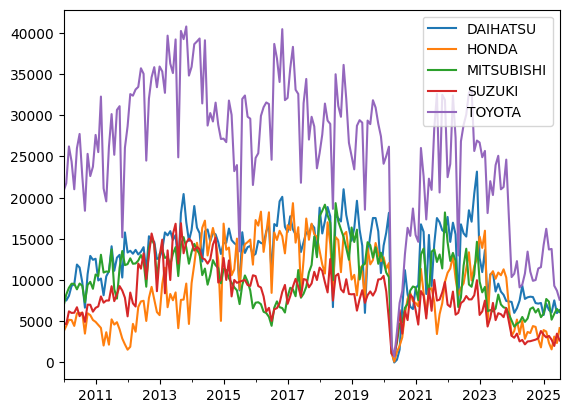

In [106]:
df[brands].plot()

In [107]:
from scipy.stats import mstats

# Tentukan batas persentase (misalnya, 5%)
lower_percent = 0.05  # 5% dari data untuk batas bawah
upper_percent = 0.05  # 5% dari data untuk batas atas

for brand in brands:
    # Terapkan winsorization dengan 5% batas bawah dan batas atas
    df[brand] = mstats.winsorize(df[brand], limits=(lower_percent, upper_percent))


In [108]:
exog = [i for i in list(df.columns) if i not in brands]

In [109]:
# Memeriksa apakah ada NaN atau Infinity dalam data eksogen
if df[exog].isna().any().any() or not np.isfinite(df[exog]).all().all():
    print("Data eksogen mengandung NaN atau Infinity. Mengatasi...")

    # Mengganti NaN dengan nilai tertentu (misalnya 0 atau rata-rata kolom)
    df[exog] = df[exog].fillna(0)  # Atau bisa menggunakan df[exog].fillna(df[exog].mean())

    # Mengganti Infinity dengan nilai tertentu (misalnya 0)
    df[exog] = df[exog].replace([np.inf, -np.inf], 0)

# Cek apakah masalah sudah teratasi
print(df[exog].isna().sum())  # Memastikan tidak ada NaN
print(np.isfinite(df[exog]).all().all())  # Memastikan tidak ada Infinity


Data eksogen mengandung NaN atau Infinity. Mengatasi...
jpy                      0
usd                      0
inflasi                  0
BI Rate                  0
TOYOTA_lag1              0
TOYOTA_lag3              0
TOYOTA_ma3               0
TOYOTA_ma6               0
TOYOTA_mom_growth        0
TOYOTA_vol3              0
TOYOTA_vol6              0
TOYOTA_share             0
TOYOTA_rsi14             0
DAIHATSU_lag1            0
DAIHATSU_lag3            0
DAIHATSU_ma3             0
DAIHATSU_ma6             0
DAIHATSU_mom_growth      0
DAIHATSU_vol3            0
DAIHATSU_vol6            0
DAIHATSU_share           0
DAIHATSU_rsi14           0
MITSUBISHI_lag1          0
MITSUBISHI_lag3          0
MITSUBISHI_ma3           0
MITSUBISHI_ma6           0
MITSUBISHI_mom_growth    0
MITSUBISHI_vol3          0
MITSUBISHI_vol6          0
MITSUBISHI_share         0
MITSUBISHI_rsi14         0
HONDA_lag1               0
HONDA_lag3               0
HONDA_ma3                0
HONDA_ma6                0

<Axes: >

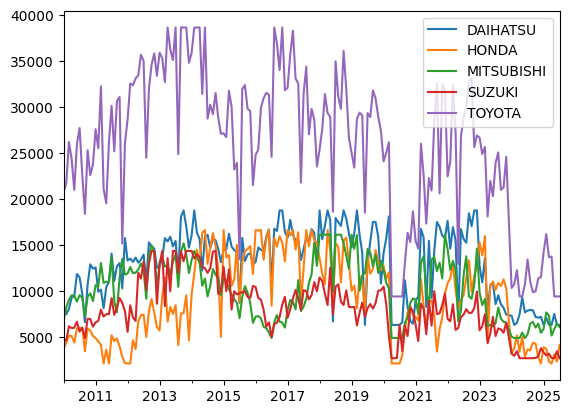

In [110]:
df[brands].plot()

In [111]:
for brand in brands:
  print(f"min: {min(df[brand])}, max: {max(df[brand])}")

min: 6354.101, max: 18788.0
min: 2165.0, max: 16659.0
min: 4931.16, max: 16156.0
min: 2736.0, max: 14390.0
min: 9445.956, max: 38662.0


In [112]:
import numpy as np
import pandas as pd

# Assuming `df` is your pandas DataFrame, with rows as time and columns as brands
scaled_series = {}
original_series = {}

for brand in df.columns:
    # Get the original series for the brand
    original_series[brand] = df[brand]

    # Ganti nilai negatif dengan 0 atau nilai lainnya
    df[brand] = df[brand].clip(lower=0)  # Gantilah nilai negatif dengan 0

    # Apply log transformation using np.log1p
    log_transformed_brand = np.log1p(df[brand])

    # Store the log-transformed series in the dictionary
    scaled_series[brand] = log_transformed_brand


In [94]:
import matplotlib.pyplot as plt

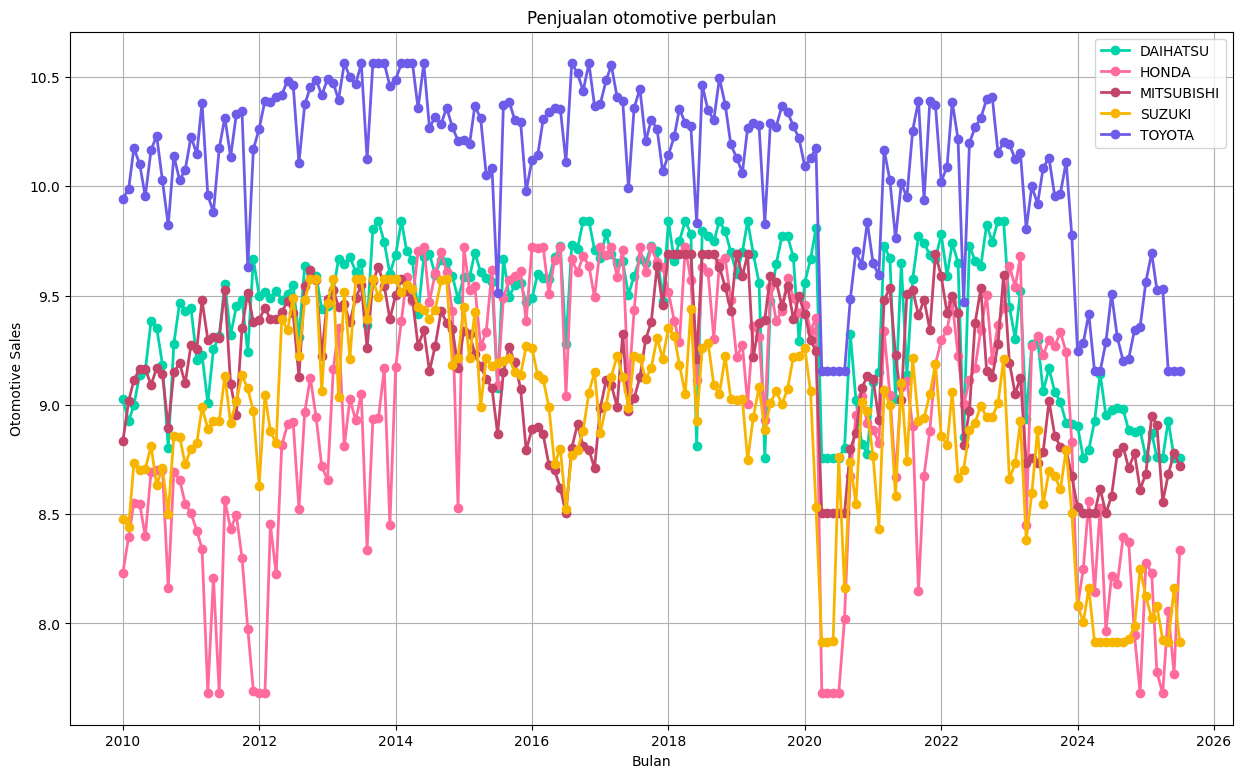

In [113]:
plt.figure(figsize=(15,9))
for i, brand in enumerate(brands):
    plt.plot(df.index, scaled_series[brand], marker='o', color=colors[i], label=brand, linewidth=2.0)
plt.title('Penjualan otomotive perbulan')
plt.xlabel('Bulan')
plt.ylabel('Otomotive Sales')
plt.grid(True)
plt.legend()
plt.show()

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Analisis Tools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [115]:
def adf_test(timeseries, name=""):
    # print(f"=== ADF Test for {name} ===")
    # print("==============================")

    result = adfuller(timeseries.dropna())

    hasil_adf = pd.Series(result[0:4],
                          index=["Test Statistic", "p-value", "Lags Used", "Number of Observations Used"])

    for key, value in result[4].items():
        hasil_adf[f"Critical Value ({key})"] = value

    # print(hasil_adf, "\n")

    if result[1] <= 0.05:
        # print("✅ Data stasioner (tolak H0)\n")
        return True
    else:
        # print("❌ Data tidak stasioner (gagal tolak H0)\n")
        return False


In [116]:
# Perform ADF test on each scaled time series
differencing_steps = {}

for brand, series in scaled_series.items():
    step = 0
    pandas_series = series.copy()
    should_stop = adf_test(pandas_series, name=brand)
    while not should_stop:
        step += 1
        pandas_series = series.copy().diff()
        should_stop = adf_test(pandas_series, name=brand)
        if step > 10:
          print("Step too much, stopping")
          break
    differencing_steps[brand] = step
    print(f"Brand: {brand}, Steps: {step}")


Brand: jpy, Steps: 1
Brand: usd, Steps: 1
Brand: inflasi, Steps: 1
Brand: BI Rate, Steps: 1
Brand: DAIHATSU, Steps: 1
Brand: HONDA, Steps: 0
Brand: MITSUBISHI, Steps: 1
Brand: SUZUKI, Steps: 1
Brand: TOYOTA, Steps: 1
Brand: TOYOTA_lag1, Steps: 0
Brand: TOYOTA_lag3, Steps: 0
Brand: TOYOTA_ma3, Steps: 1
Brand: TOYOTA_ma6, Steps: 1
Brand: TOYOTA_mom_growth, Steps: 0
Brand: TOYOTA_vol3, Steps: 0
Brand: TOYOTA_vol6, Steps: 0
Brand: TOYOTA_share, Steps: 1
Brand: TOYOTA_rsi14, Steps: 0
Brand: DAIHATSU_lag1, Steps: 0
Brand: DAIHATSU_lag3, Steps: 0
Brand: DAIHATSU_ma3, Steps: 0
Brand: DAIHATSU_ma6, Steps: 1
Brand: DAIHATSU_mom_growth, Steps: 1
Brand: DAIHATSU_vol3, Steps: 0
Brand: DAIHATSU_vol6, Steps: 1
Brand: DAIHATSU_share, Steps: 0
Brand: DAIHATSU_rsi14, Steps: 1
Brand: MITSUBISHI_lag1, Steps: 0
Brand: MITSUBISHI_lag3, Steps: 0
Brand: MITSUBISHI_ma3, Steps: 0
Brand: MITSUBISHI_ma6, Steps: 1
Brand: MITSUBISHI_mom_growth, Steps: 0
Brand: MITSUBISHI_vol3, Steps: 0
Brand: MITSUBISHI_vol6, Steps

#ARIMA

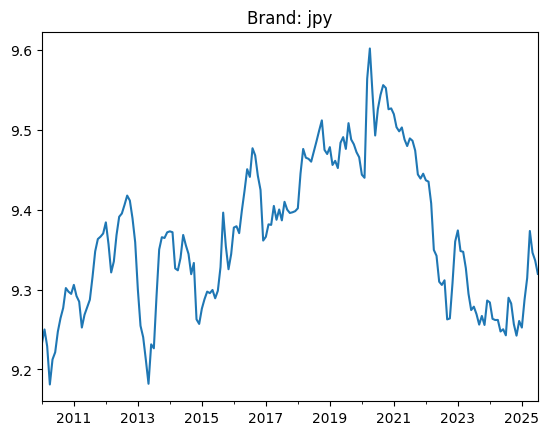

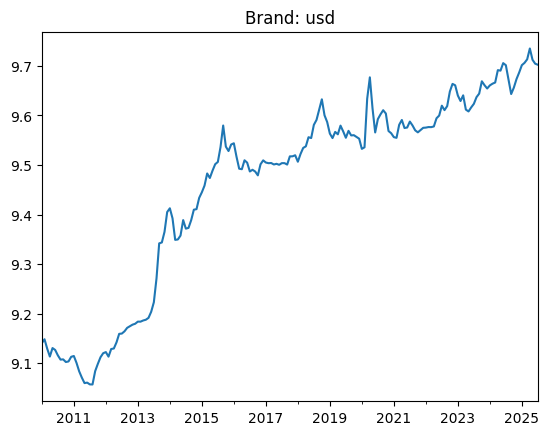

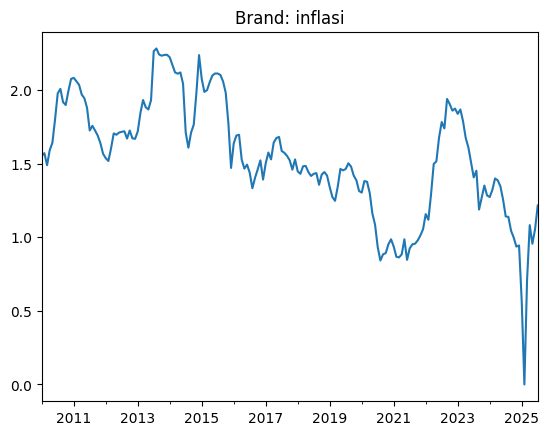

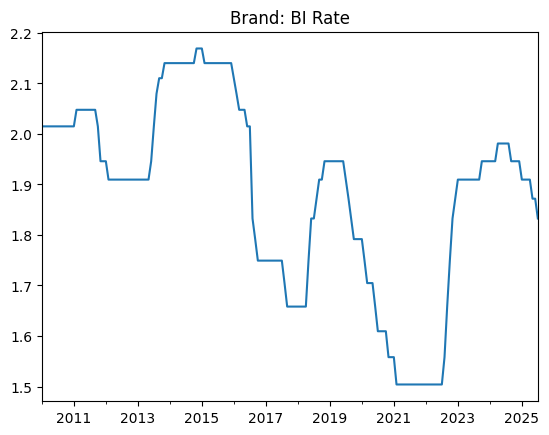

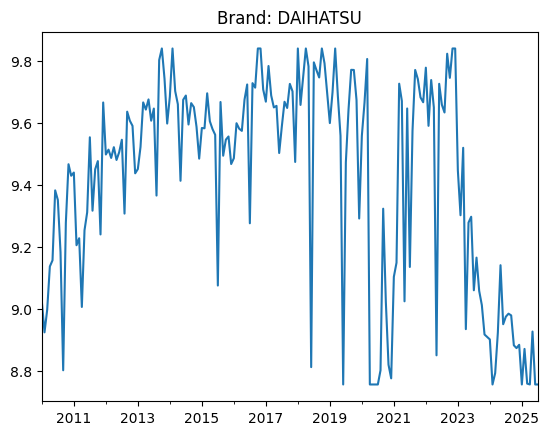

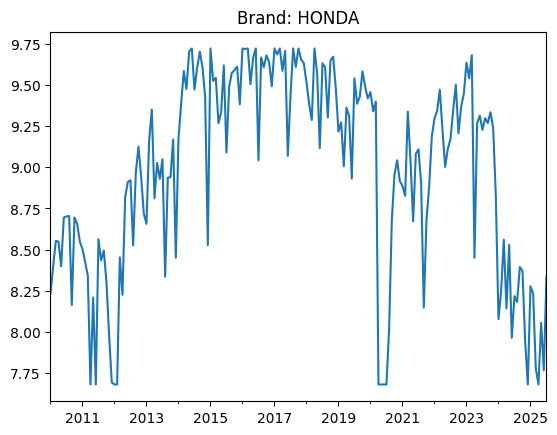

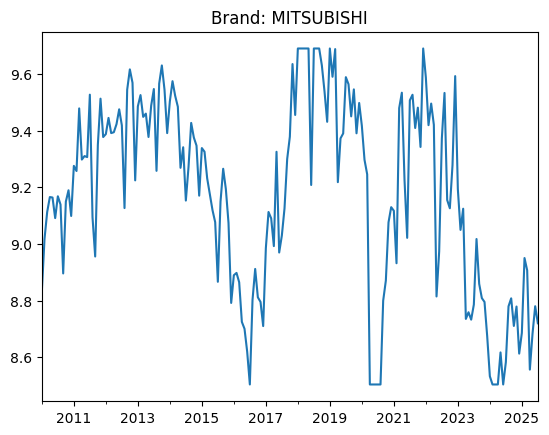

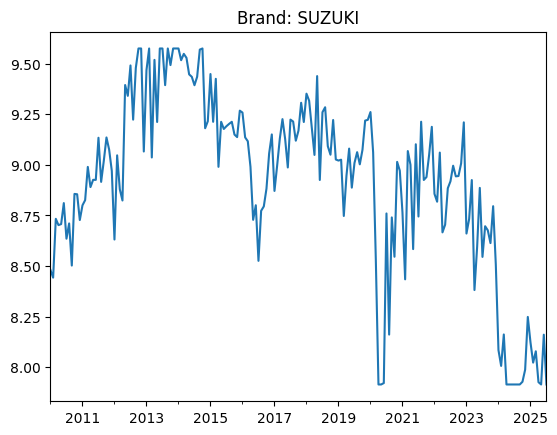

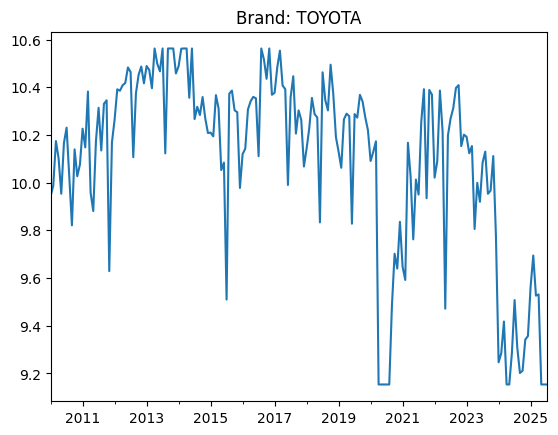

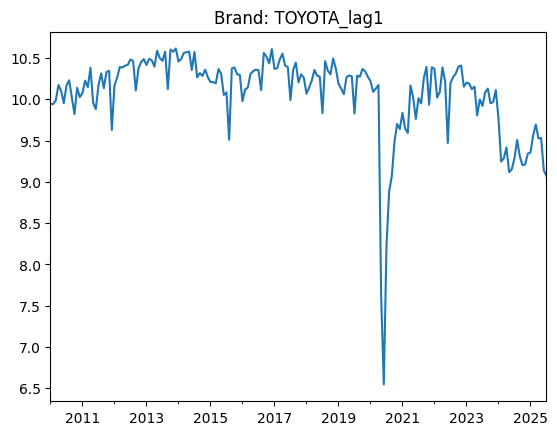

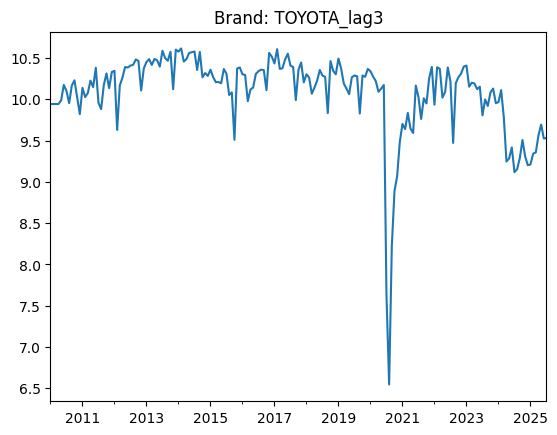

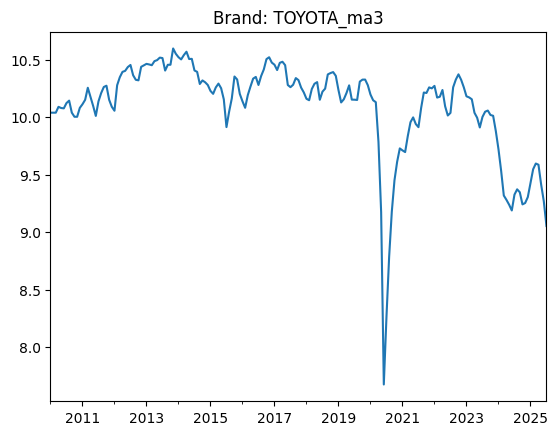

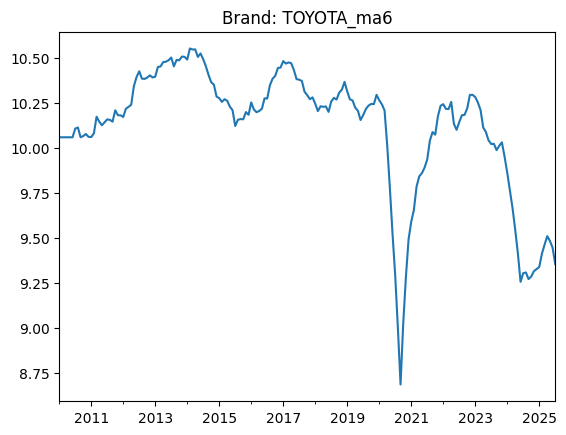

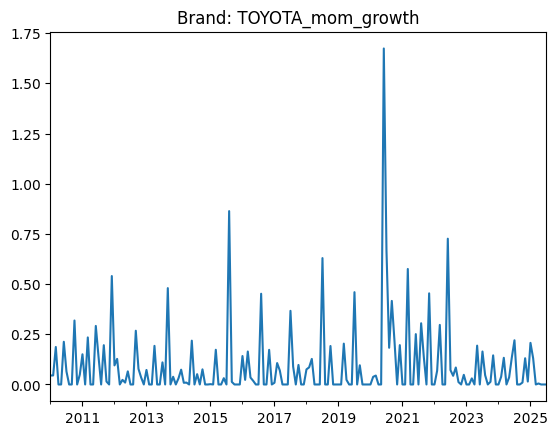

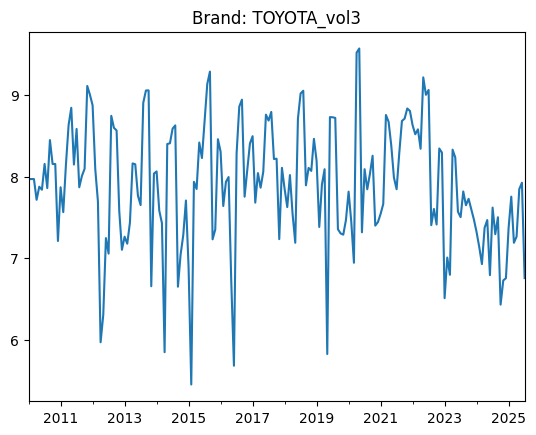

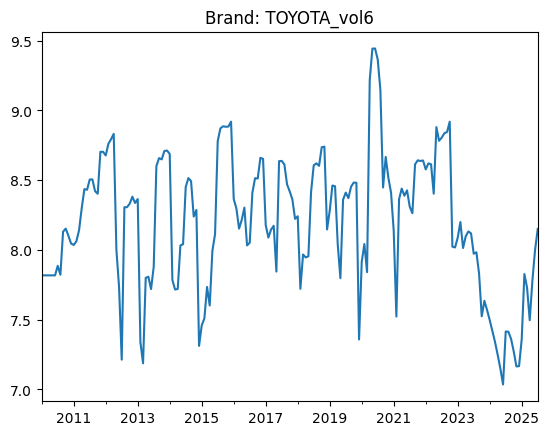

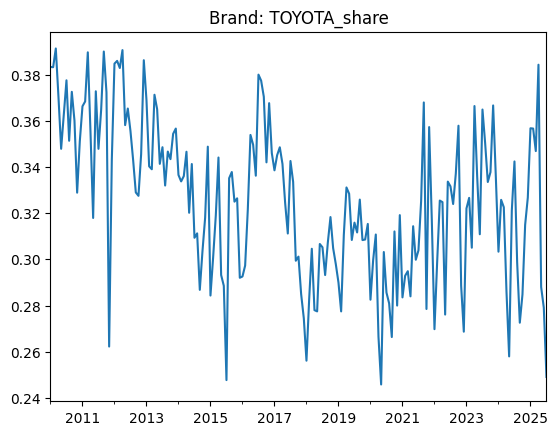

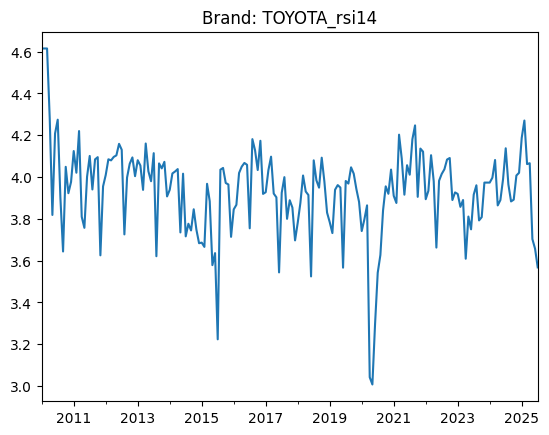

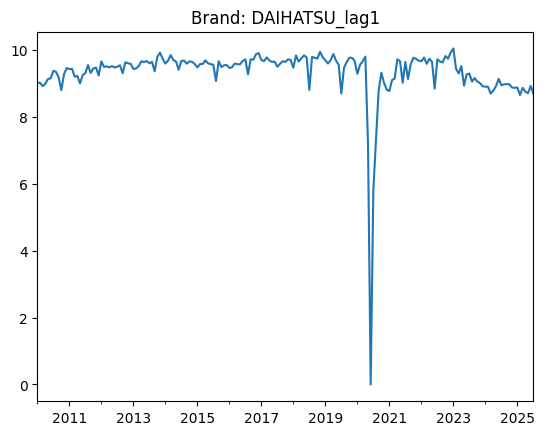

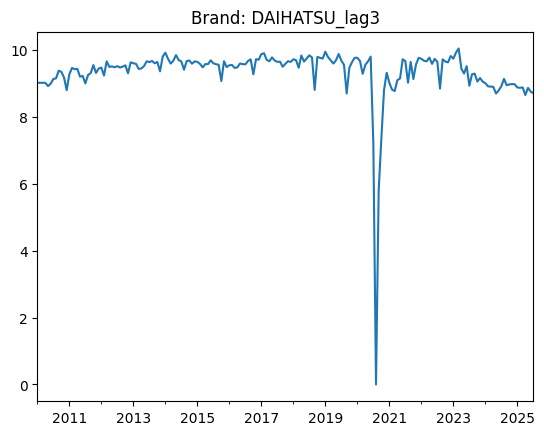

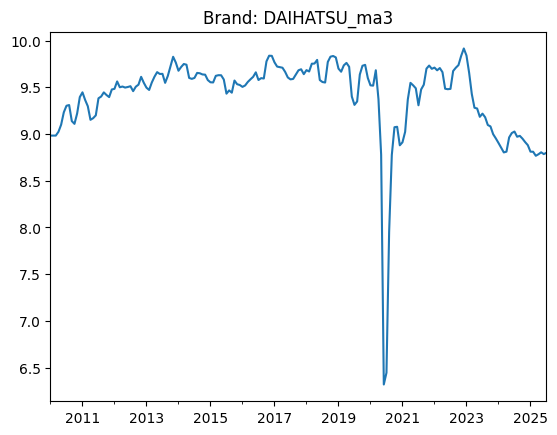

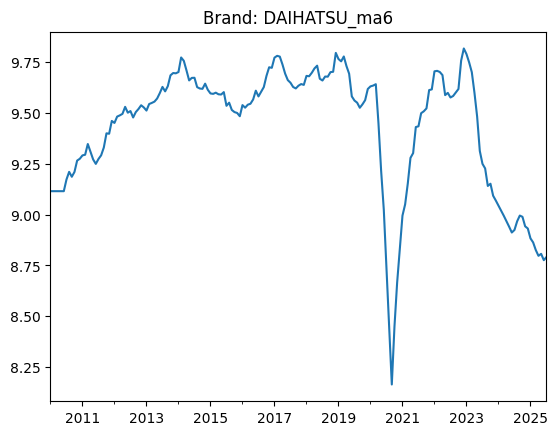

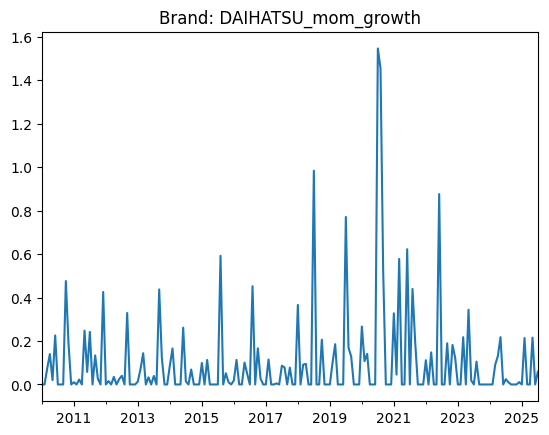

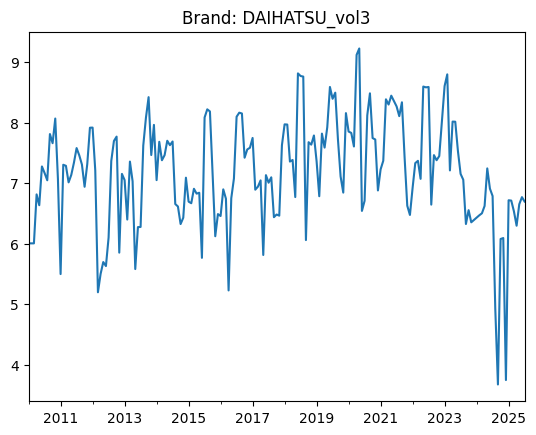

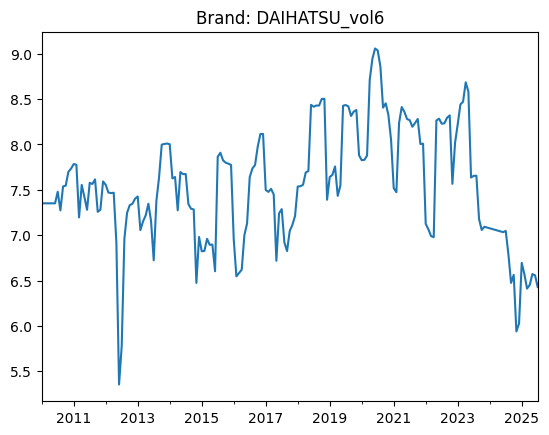

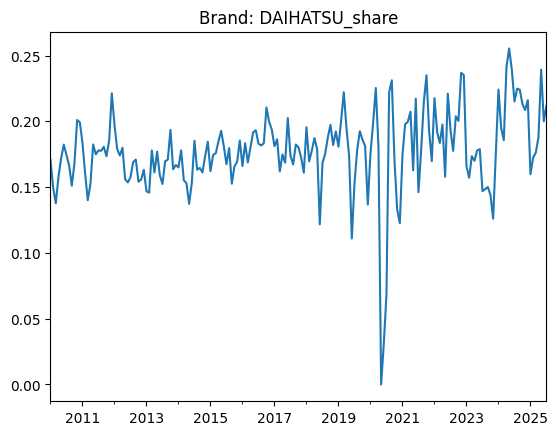

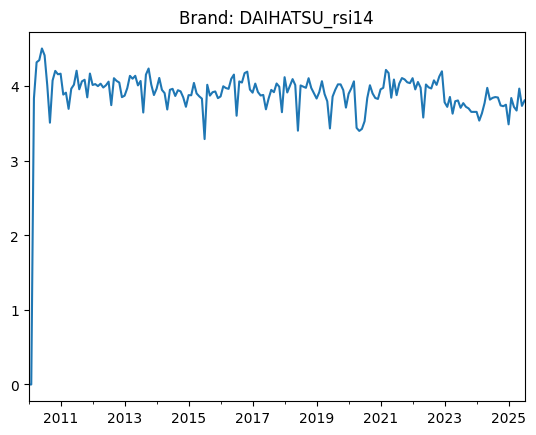

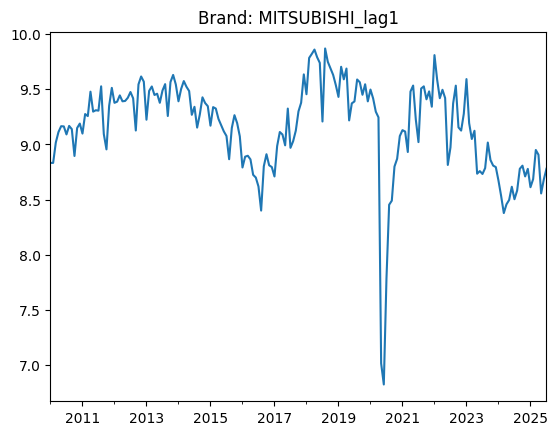

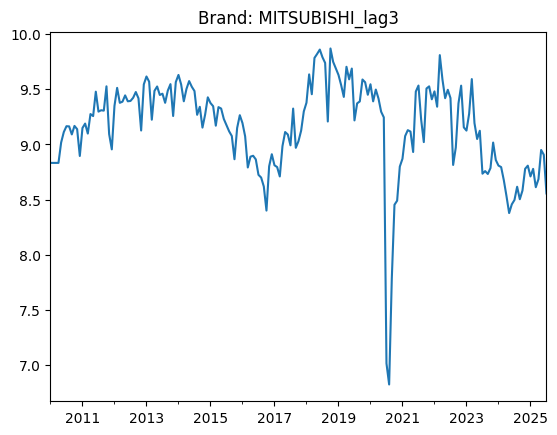

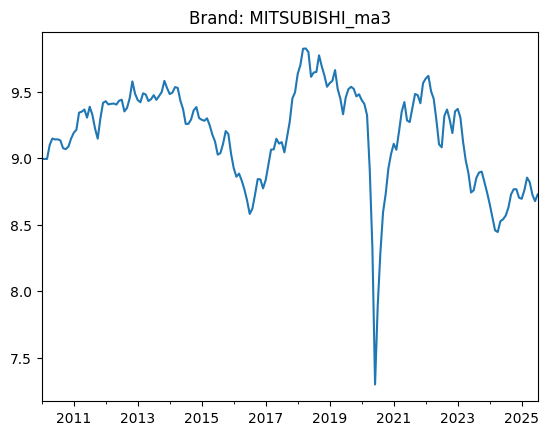

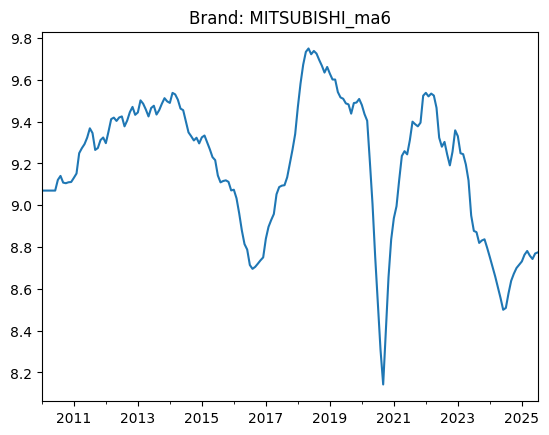

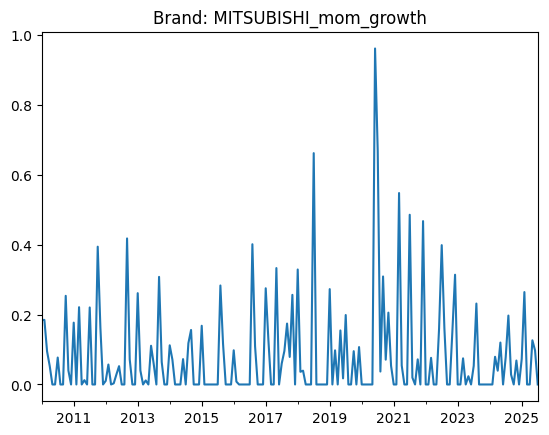

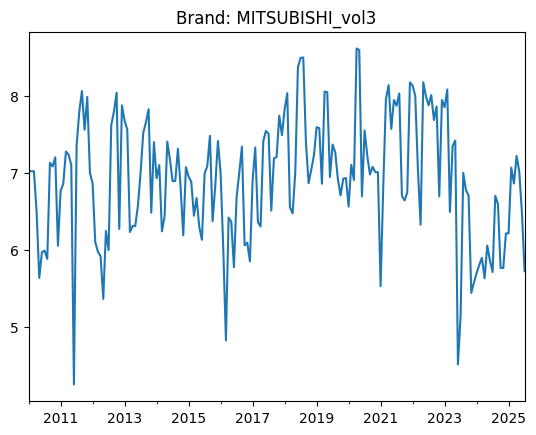

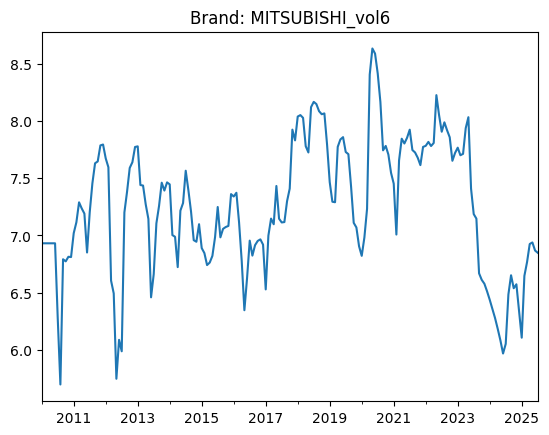

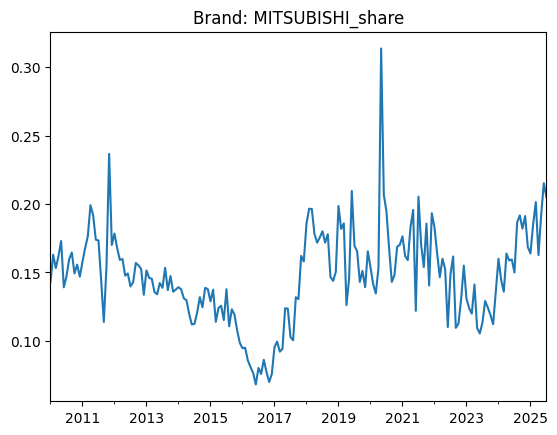

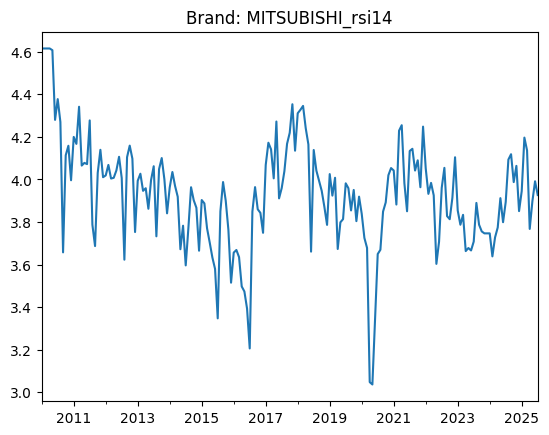

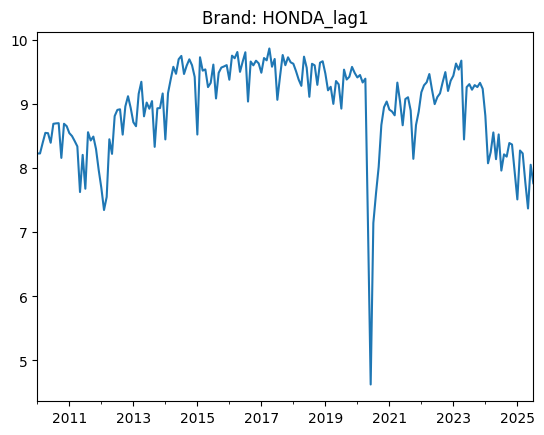

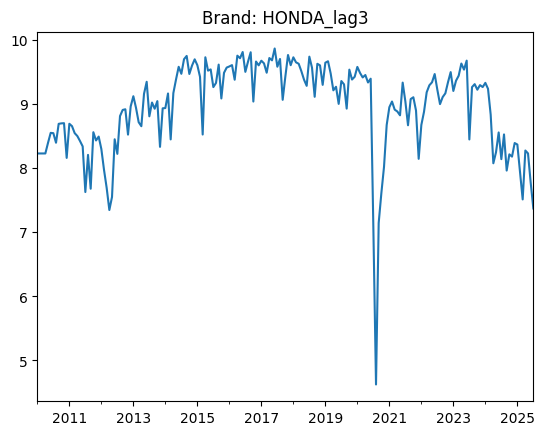

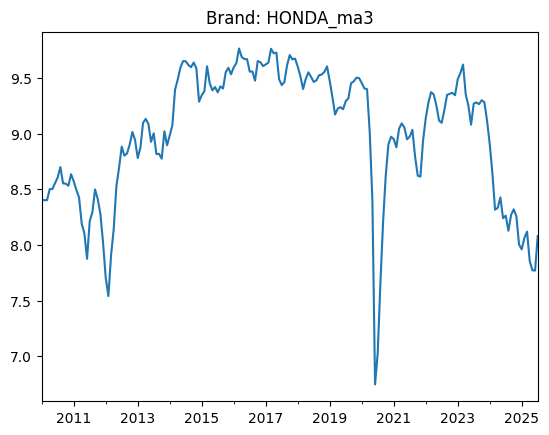

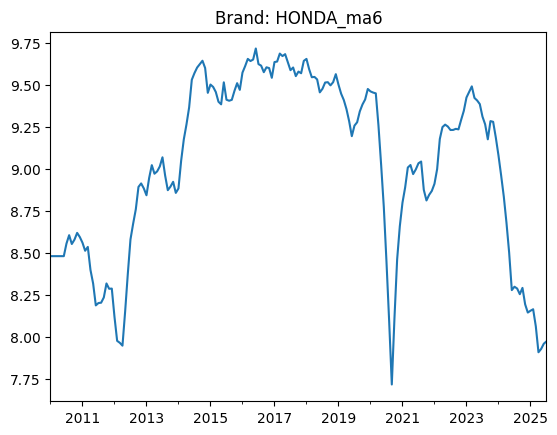

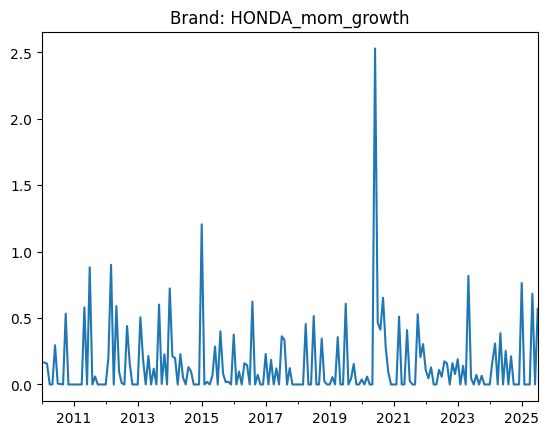

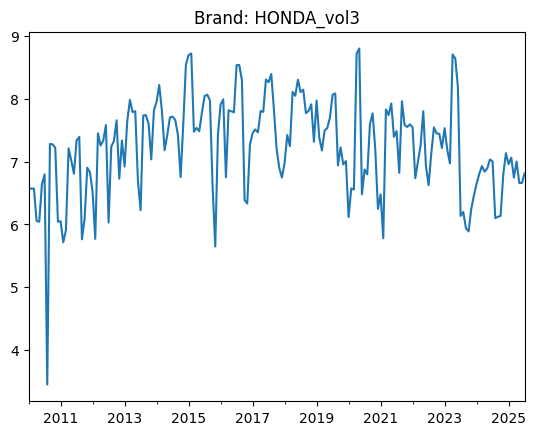

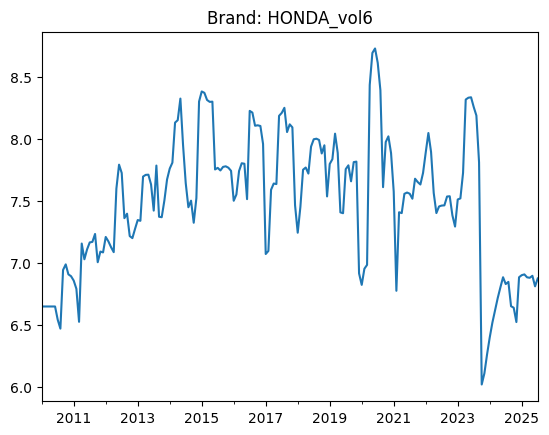

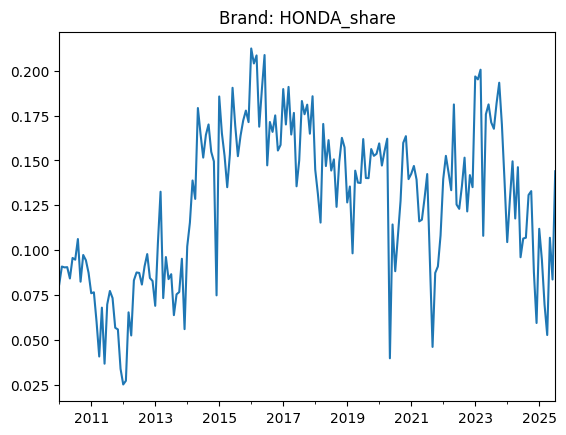

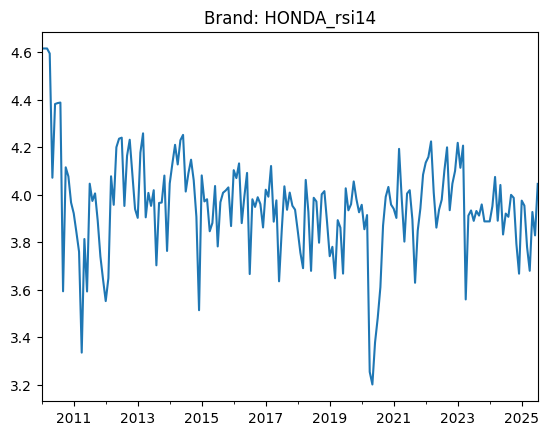

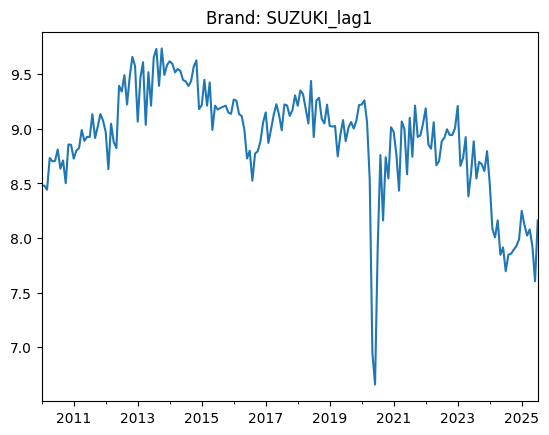

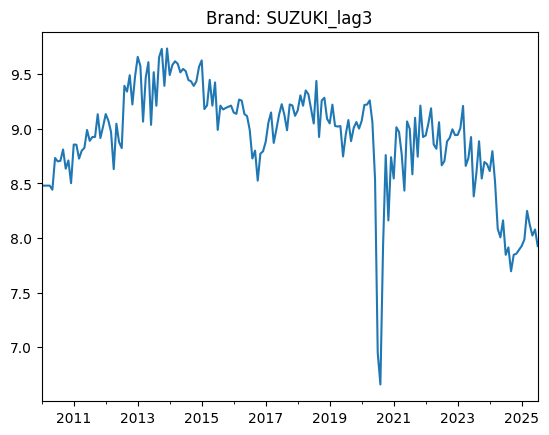

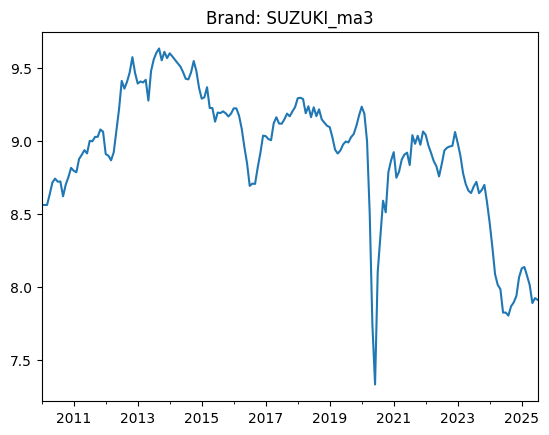

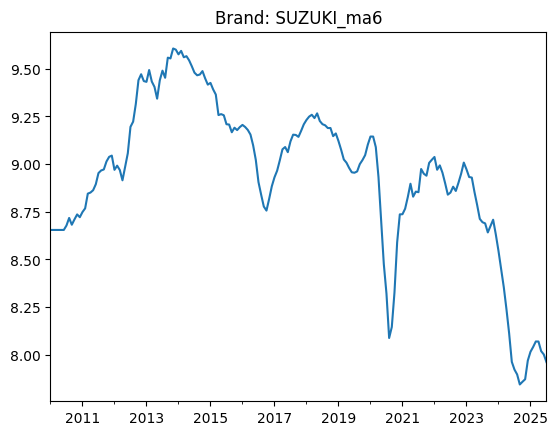

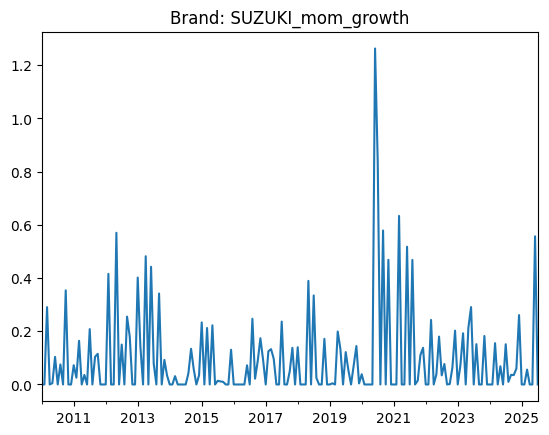

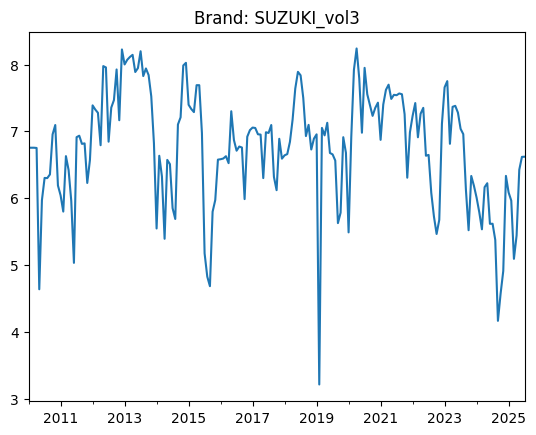

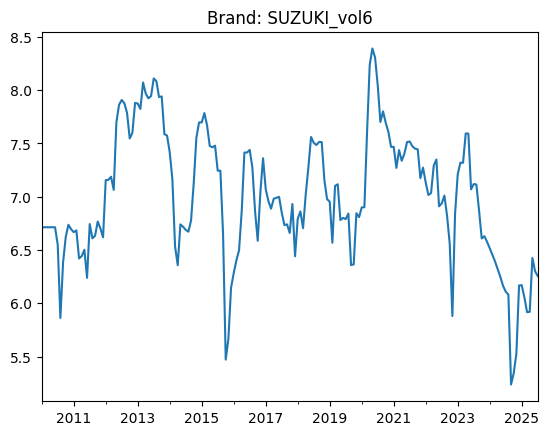

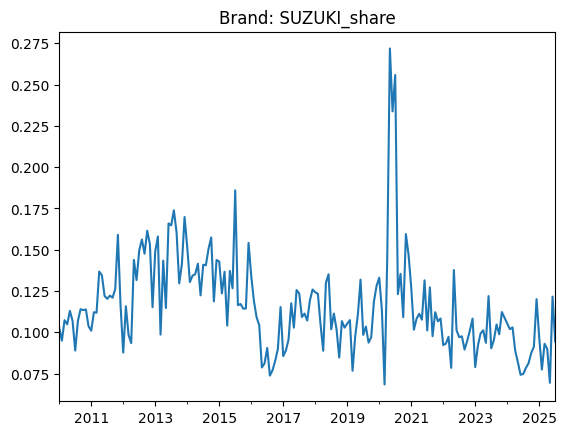

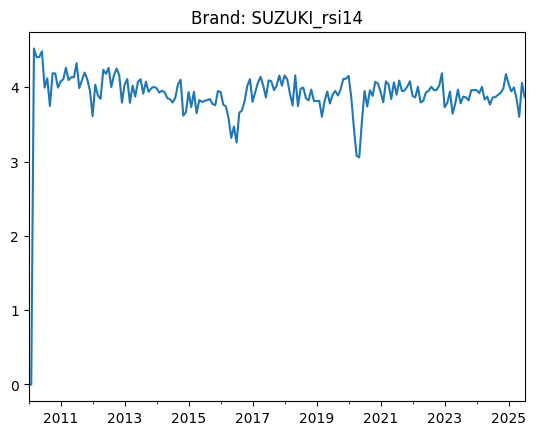

In [117]:

for brand, series in scaled_series.items():
  series.plot()
  plt.title(f"Brand: {brand}")
  plt.show()

In [118]:
# from darts import TimeSeries
# from darts.models import ARIMA
# from darts.metrics import smape
# import numpy as np
# import pandas as pd

# import warnings
# from statsmodels.tools.sm_exceptions import ConvergenceWarning  # Correct import for ConvergenceWarning

# # Suppress specific warnings (e.g., ConvergenceWarning and UserWarning)
# warnings.filterwarnings("ignore", category=UserWarning)  # Non-invertible MA parameter warning
# warnings.filterwarnings("ignore", category=ConvergenceWarning)  # Convergence issues


# def forecast(series, max_q=5, max_p=5, max_d=3, test_length = 6):
#     ts = TimeSeries.from_series(scaled_series[series], fill_missing_dates=True, freq="MS")
#     actual_ts = TimeSeries.from_series(df[series], fill_missing_dates=True, freq="MS")

#     # test_length = 6
#     train, test = ts[:-test_length], ts[-test_length:]
#     actual_train, actual_test = actual_ts[:-test_length], actual_ts[-test_length:]

#     best = {"smape": float('inf'), "p": None, "q": None, "d": differencing_steps[series]}
#     d = differencing_steps[series]
#     # Loop through possible p, q values
#     for p in range(max_p + 1):
#       for q in range(max_q + 1):
#         # for d in range(max_d+1):
#         try:
#             # Fit the ARIMA model with the current p and q
#             model = ARIMA(p=p, d=d, q=q)
#             model.fit(train)  # Fit with exogenous variables
#             fr = model.predict(n=test_length)  # Forecast with exogenous variables


#             # Flatten the prediction result and apply the inverse of the log transformation
#             fr_series = pd.Series(fr.values().flatten())  # Flatten to 1D array
#             fr_inverted = np.expm1(fr_series)  # Apply expm1 for inverse log transformation

#             # Create a time index for the predictions (using the same time index as the test data)
#             time_index = test.time_index  # Use the time index of the test set
#             fr_inverted_series = TimeSeries.from_times_and_values(time_index, fr_inverted)  # Convert to TimeSeries

#             # Calculate SMAPE between the inverted forecast and actual test data
#             acc = smape(fr_inverted_series, actual_test)
#             # print(f"SMAPE for p={p}, q={q}: {acc}")
#             print(f"[{series}]",p,d,q,":",acc)
#             # Update the best result if we get a lower SMAPE
#             if acc < best["smape"] and acc > 0.7:
#                 best = {"smape": acc, "p": p, "q": q, "d": d, "forecast": fr_inverted_series, "actual": actual_test}

#         except Exception as e:
#             print(f"Error for p={p}, q={q}: {e}")
#             continue

#     return best


In [119]:
# results = {}
# for brand in brands:
#   results[brand] = forecast(brand, max_p = 5, max_q=5, max_d=differencing_steps[brand], test_length=6)

<h1>ARIMAX</h1>

In [120]:
from statsmodels.tsa.arima.model import ARIMA


In [126]:
import numpy as np

# Fungsi untuk menghitung SMAPE (Jika Anda ingin menggunakan yang custom)
def smape(y_true, y_pred):
    epsilon = 1e-10  # Nilai kecil untuk menghindari pembagian dengan 0
    diff = np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + epsilon)
    smape_value = 200 * np.mean(diff)
    return smape_value


In [127]:
df_list = [scaled_series[series] for series in scaled_series]
df_combine = pd.concat(df_list, axis=1)

In [182]:
df_combine.corr()['DAIHATSU'][exog]

jpy                      0.210268
usd                     -0.146778
inflasi                  0.396954
BI Rate                 -0.026620
TOYOTA_lag1              0.612963
TOYOTA_lag3              0.552008
TOYOTA_ma3               0.726774
TOYOTA_ma6               0.720872
TOYOTA_mom_growth       -0.011029
TOYOTA_vol3              0.104562
TOYOTA_vol6              0.252464
TOYOTA_share             0.037369
TOYOTA_rsi14             0.249345
DAIHATSU_lag1            0.471401
DAIHATSU_lag3            0.376170
DAIHATSU_ma3             0.735965
DAIHATSU_ma6             0.780200
DAIHATSU_mom_growth      0.035400
DAIHATSU_vol3            0.161191
DAIHATSU_vol6            0.117088
DAIHATSU_share           0.263765
DAIHATSU_rsi14           0.409225
MITSUBISHI_lag1          0.553307
MITSUBISHI_lag3          0.498852
MITSUBISHI_ma3           0.628795
MITSUBISHI_ma6           0.585996
MITSUBISHI_mom_growth   -0.008842
MITSUBISHI_vol3          0.173914
MITSUBISHI_vol6          0.206489
MITSUBISHI_sha

In [128]:
df_combine.head()

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   

            DAIHATSU_vol3  DAIHATSU_vol6  DAIHATSU_share  DAIHATSU_rsi14  \
2010-01-01       6.005535       7.351143        0.170972    1.000000e-09   
2010-02-01       6.005535       7.351143        0.149608    1.000000e-09   
2010-03-01       6.005535       7.351143        0.137705    3.838265e+00   
2010-04-01       6.813935       7.351143        0.157773    4.321789e+00   
2010-05-01       6.635492       7.351143        0.172012    4.350681e+00   

            MITSUBISHI_lag1  MITSUBISHI_lag3  MITSUBISHI_ma3  MITSUBISHI_ma6  \
2010-01-01         8.832879         8.832879        8.994338        9.070197   
2010-02-01         8.832879         8.832879        8.994338        9.070197   
2010-03-01         9.017605         8.832879        8.994338        9.070197   
2010-04-01         9.112617         8.832879        9.100414        9.070197   
2010-05-01         9.165448         9.017605        9.147578        9.070197   

            MITSUBISHI_mom_growth  MITSUBISHI_vol3  MITSUBISHI_vol6  \
2010-01-01               0.184750         7.020749         6.930997   
2010-02-01               0.184750         7.020749         6.930997   
2010-03-01               0.095023         7.020749         6.930997   
2010-04-01               0.052836         6.499592         6.930997   
2010-05-01               0.000000         5.636759         6.930997   

            MITSUBISHI_share  MITSUBISHI_rsi14  HONDA_lag1  HONDA_lag3  \
2010-01-01          0.143198          4.615121    8.231110    8.231110   
2010-02-01          0.162974          4.615121    8.231110    8.231110   
2010-03-01          0.153242          4.615121    8.396606    8.231110   
2010-04-01          0.161877          4.615121    8.552560    8.231110   
2010-05-01          0.172994          4.607027    8.547722    8.396606   

            

<Figure size 1200x600 with 0 Axes>

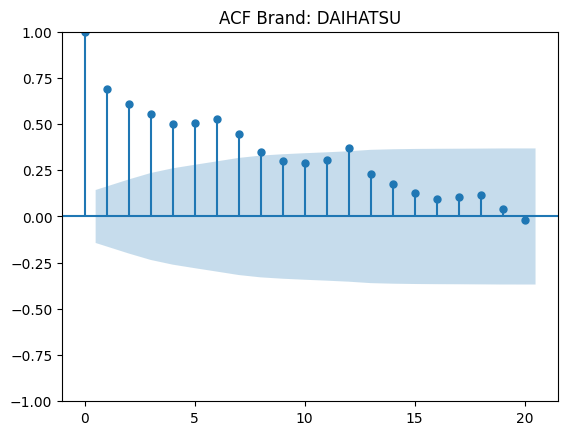

<Figure size 1200x600 with 0 Axes>

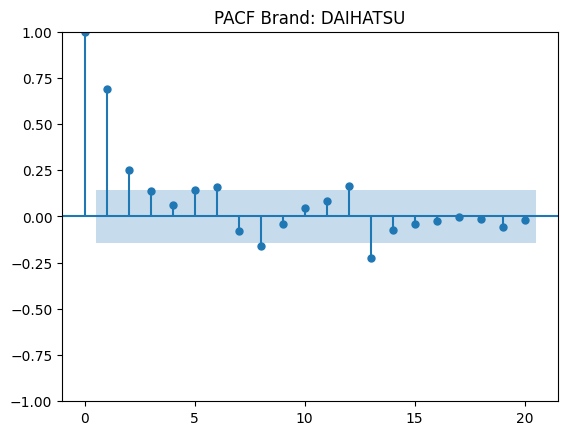

<Figure size 1200x600 with 0 Axes>

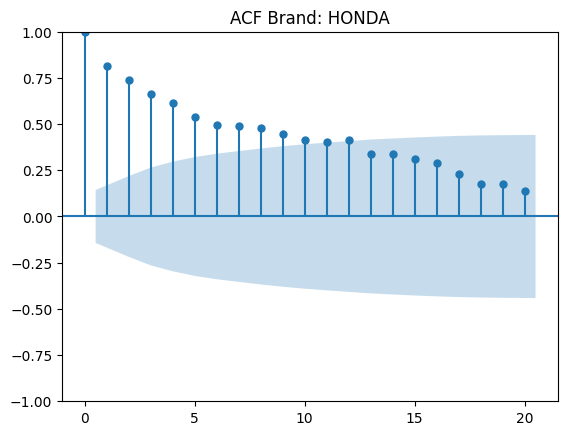

<Figure size 1200x600 with 0 Axes>

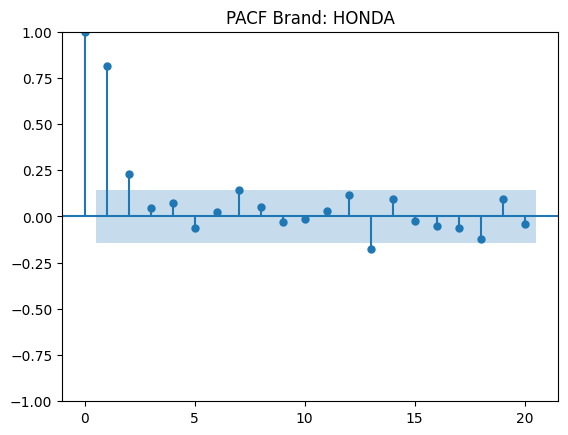

<Figure size 1200x600 with 0 Axes>

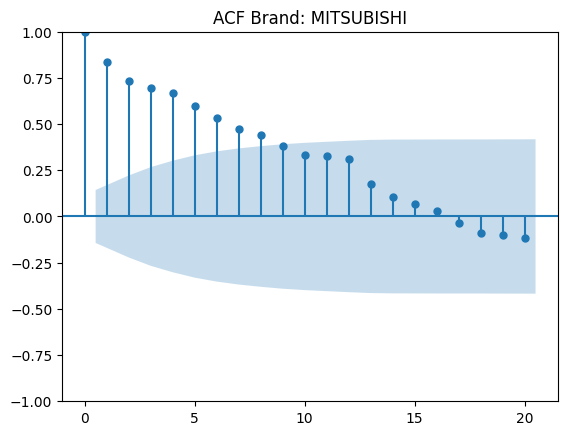

<Figure size 1200x600 with 0 Axes>

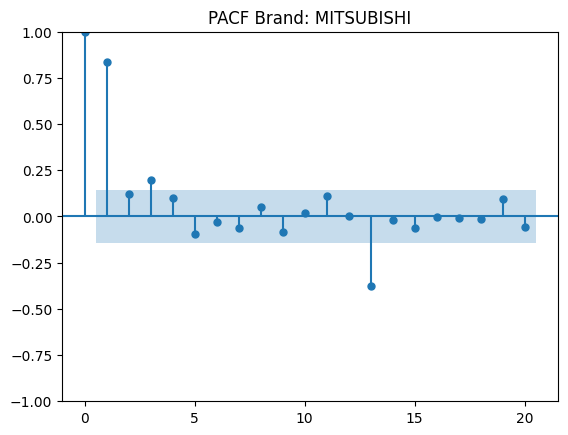

<Figure size 1200x600 with 0 Axes>

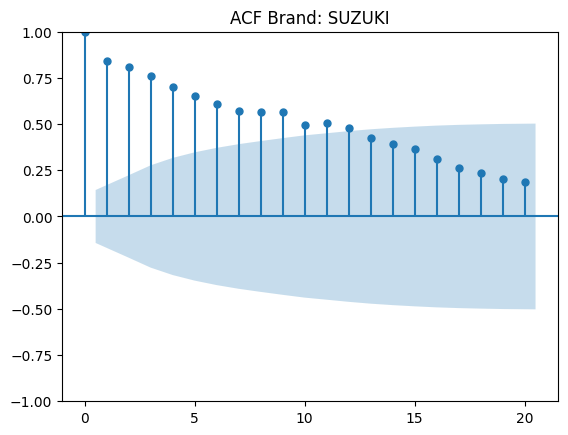

<Figure size 1200x600 with 0 Axes>

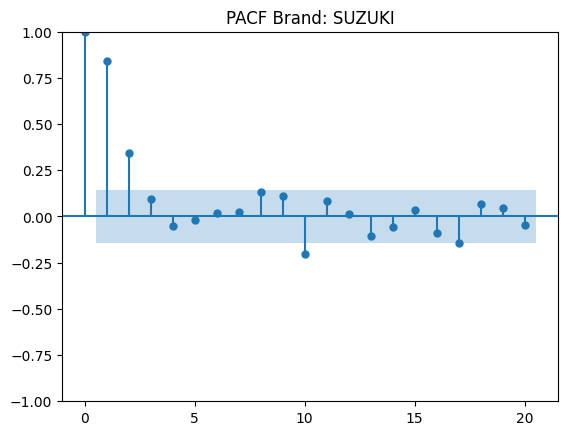

<Figure size 1200x600 with 0 Axes>

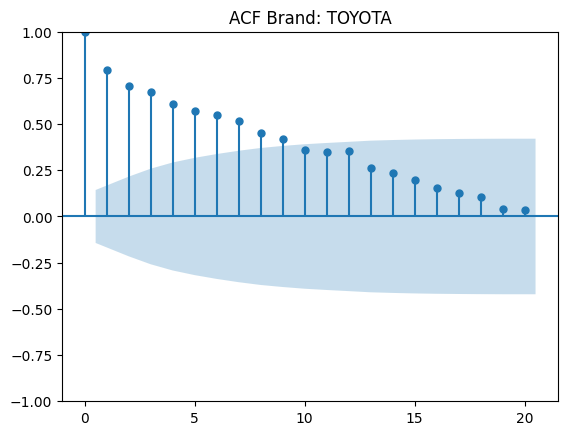

<Figure size 1200x600 with 0 Axes>

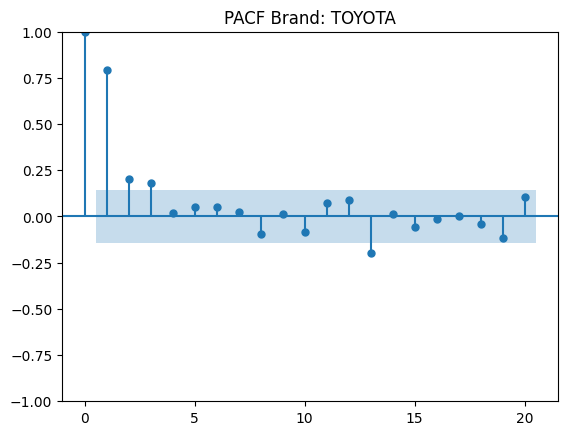

In [129]:
for brand in brands:
  s = scaled_series[brand]
  plt.figure(figsize=(12,6))
  plot_acf(s, lags=20)
  plt.title(f"ACF Brand: {brand}")
  plt.show()

  plt.figure(figsize=(12,6))
  plot_pacf(s, lags=20)
  plt.title(f"PACF Brand: {brand}")
  plt.show()

  pq = []
  pq.append([1,0])
  pq.append([1, 1])

In [130]:

def arimax(series, max_q=5, max_p=5, max_d=3, test_length = 6):
  d = differencing_steps[series]
  train, test = df_combine[series][:-test_length], df_combine[series][-test_length:]
  original_train, original_test = df[series][:-test_length], df[series][-test_length:]
  best = {"smape": float('inf'), "p": None, "q": None, "d": differencing_steps[series]}

  for p in range(max_p + 1):
    for q in range(max_q + 1):
      model = ARIMA(train, exog=df_combine[exog][:-test_length], order=(p,d,q))
      model_fit = model.fit()
      fr = model_fit.forecast(steps=test_length, exog=df_combine[exog][-test_length:])
      fr_inverted = np.expm1(fr)
      acc = smape(fr_inverted, original_test)

      if (acc < best["smape"]) and (acc > 0.7):
        best = {"smape": acc, "p": p, "q": q, "d": d, "forecast": fr_inverted, "actual": original_test}
      print(f"[{brand}]", best["smape"], p, d, q)
  return best


In [131]:
import numpy as np
from darts import TimeSeries
from darts.metrics import smape as darts_smape

def smape_np(y_pred, y_true, eps=1e-12):
    """
    Hitung SMAPE dengan darts.metrics.smape.
    
    Parameters
    ----------
    y_pred : array-like, pd.Series, atau list
    y_true : array-like, pd.Series, atau list
    eps : float
        Nilai kecil untuk mencegah pembagian nol (tidak terlalu dipakai di darts).
    """
    # pastikan jadi pandas.Series agar TimeSeries.from_series bisa dipakai
    import pandas as pd
    if not isinstance(y_pred, pd.Series):
        y_pred = pd.Series(np.asarray(y_pred, dtype=float))
    if not isinstance(y_true, pd.Series):
        y_true = pd.Series(np.asarray(y_true, dtype=float))

    # pastikan panjang sama
    min_len = min(len(y_pred), len(y_true))
    y_pred = y_pred.iloc[:min_len]
    y_true = y_true.iloc[:min_len]

    ts_pred = TimeSeries.from_series(y_pred)
    ts_true = TimeSeries.from_series(y_true)

    return darts_smape(ts_true, ts_pred)


In [132]:
# # ===== Utils murni (top-level, aman untuk dipickle) =====
# def smape_np(y_pred, y_true, eps=1e-12):
#     import numpy as np
#     y_pred = np.asarray(y_pred, dtype=float)
#     y_true = np.asarray(y_true, dtype=float)
#     denom = (np.abs(y_true) + np.abs(y_pred)) + eps
#     return float(np.mean(2.0 * np.abs(y_pred - y_true) / denom))

In [133]:


def evaluate_pq_worker_flat(task, series_data_b, dmap_b):
    """
    task: (series_name, p, q)
    series_data_b: broadcast -> dict[series] = {
        'train': (vals, idx),
        'test':  (vals, idx),           # optional (panjang)
        'orig_test': (vals, idx),
        'Xtr': (vals, cols, idx),
        'Xte': (vals, cols, idx)
    }
    dmap_b: broadcast -> dict[series] = d
    Return:
      (series, (smape, p, q, forecast_list, index_list))   atau None jika gagal/invalid
    """
    series, p, q = task
    import warnings
    import numpy as np
    import pandas as pd
    from statsmodels.tsa.arima.model import ARIMA

    try:
        pack = series_data_b.value[series]
        d = int(dmap_b.value[series])

        train_vals, train_idx = pack['train']
        orig_vals,  orig_idx  = pack['orig_test']
        Xtr_vals, Xtr_cols, Xtr_idx = pack['Xtr']
        Xte_vals, Xte_cols, Xte_idx = pack['Xte']

        train_s = pd.Series(train_vals, index=pd.Index(train_idx, name="date"))
        original_test_s = pd.Series(orig_vals, index=pd.Index(orig_idx, name="date"))
        exog_train_df = pd.DataFrame(Xtr_vals, index=pd.Index(Xtr_idx, name="date"), columns=Xtr_cols)
        exog_test_df  = pd.DataFrame(Xte_vals, index=pd.Index(Xte_idx, name="date"), columns=Xte_cols)

        warnings.filterwarnings("ignore")
        model = ARIMA(train_s, exog=exog_train_df, order=(int(p), d, int(q)))
        model_fit = model.fit()
        fr = model_fit.forecast(steps=len(original_test_s), exog=exog_test_df)
        fr_inv = np.expm1(fr.values)
        # print(fr_inv)
        acc = smape_np(fr_inv, original_test_s.values)
        # print(series, acc, int(p), int(q))
        print(f"[{series}] smape({acc}, p({int(p)}), d({int(d)}), q({int(q)})")
        # if acc > 0.7:
        return (series, (float(acc), int(p), int(q),
                         fr_inv.tolist(),
                         original_test_s.index.values.tolist()))
        # else:/
            # return None
    except Exception:
        return None


In [187]:
# ===== Driver function: siapkan paket per-series & jalankan paralel 1-layer =====
def arimax_spark_flat(series_list, df, df_combine, exog, differencing_steps,
                      max_p=5, max_q=5, test_length=6, sc=None):
    """
    - df, df_combine: pandas DataFrame (bila Anda punya Spark DF, toPandas() di DRIVER lebih dulu).
    - Tidak ada pemanggilan Spark di worker selain baca broadcast.
    - Paralelisme hanya satu lapis: flatten (series, p, q).
    """
    import numpy as np
    import pandas as pd
    
    # Jika yang masuk Spark DF, ubah ke pandas di DRIVER:
    try:
        import pyspark.sql as _ps
        if isinstance(df_combine, _ps.dataframe.DataFrame):
            df_combine = df_combine.toPandas()
        if isinstance(df, _ps.dataframe.DataFrame):
            df = df.toPandas()
    except Exception:
        pass

    # 1) Pack data per-series (DRIVER)
    def pack_series(s):
        return (np.asarray(s.values), np.asarray(s.index.values))

    def pack_frame(X):
        return (np.asarray(X.values), list(X.columns), np.asarray(X.index.values))

    series_data = {}
    dmap = {}
    for s in series_list:
        not_exog = [x for x in exog if s in x] + ['jpy', 'usd', 'inflasi', 'BI Rate']
        d = int(differencing_steps[s])
        dmap[s] = d

        train = df_combine[s].iloc[:-test_length]
        orig_test = df[s].iloc[-test_length:]
        Xtr = df_combine[exog].iloc[:-test_length]
        Xte = df_combine[exog].iloc[-test_length:]

        series_data[s] = {
            'train': pack_series(train),
            'orig_test': pack_series(orig_test),
            'Xtr': pack_frame(Xtr),
            'Xte': pack_frame(Xte)
        }

    # 2) Broadcast paket (DRIVER)
    b_series_data = sc.broadcast(series_data)
    b_dmap = sc.broadcast(dmap)

    # 3) Bentuk tugas flatten: (series, p, q)
    grid = [(p, q) for p in range(max_p + 1) for q in range(max_q + 1)]
    tasks = [(s, p, q) for s in series_list for (p, q) in grid]

    # 4) Paralel: evaluasi tiap (series,p,q) di worker (tanpa nested Spark)
    rdd = sc.parallelize(tasks)
    evaluated = (
        rdd.map(lambda task: evaluate_pq_worker_flat(task, b_series_data, b_dmap))
           .filter(lambda x: x is not None)
    )

    # 5) Reduce per-series: pilih SMAPE terendah
    def pick_better(a, b):
        # a, b: (smape, p, q, forecast_list, index_list)
        return a if a[0] <= b[0] else b

    best_per_series = (
        evaluated
        .map(lambda x: (x[0], x[1]))  # (series, candidate_tuple)
        .reduceByKey(pick_better)
        .collect()
    )

    # 6) Susun output dict {series: {...}}
    out = {}
    for s, (best_smape, best_p, best_q, fr_list, idx_list) in best_per_series:
        idx = pd.Index(idx_list, name="date")
        fr_ser = pd.Series(fr_list, index=idx)
        actual = df[s].iloc[-len(idx_list):]
        out[s] = {
            "smape": float(best_smape),
            "p": int(best_p),
            "q": int(best_q),
            "d": int(dmap[s]),
            "forecast": fr_ser,
            "actual": actual
        }

    # 7) Fallback untuk series yang tidak punya kandidat valid
    missing = set(series_list) - set(out.keys())
    if missing:
        from statsmodels.tsa.arima.model import ARIMA
        for s in missing:
            d = dmap[s]
            train = df_combine[s].iloc[:-test_length]
            orig_test = df[s].iloc[-test_length:]
            Xtr = df_combine[exog].iloc[:-test_length]
            Xte = df_combine[exog].iloc[-test_length:]
            model = ARIMA(train, exog=Xtr, order=(0, d, 0)).fit()
            fr = model.forecast(steps=test_length, exog=Xte)
            fr_inv = np.expm1(fr.values)
            acc = smape_np(fr_inv, orig_test.values)
            out[s] = {
                "smape": acc,
                "p": 0, "q": 0, "d": d,
                "forecast": pd.Series(fr_inv, index=orig_test.index),
                "actual": orig_test
            }
    return out


In [188]:
# Pastikan sc = spark.sparkContext
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ARIMAX").getOrCreate()
sc = spark.sparkContext

In [189]:
import numpy as np
import pandas as pd

# ---- parameter backtest ----
H = 6                 # horizon (test_length) per fold; kamu sudah set 1
STEP = 12             # expand per 12 bulan (1 tahun)
MIN_TRAIN = 36        # minimal panjang train (boleh sesuaikan)

# pastikan index datetime & terurut
assert isinstance(df.index, pd.DatetimeIndex)
assert isinstance(df_combine.index, pd.DatetimeIndex)
df = df.sort_index()
df_combine = df_combine.sort_index()

# daftar endpoint train (posisi akhir train, exclusive untuk test)
n = len(df)
cut_positions = list(range(MIN_TRAIN, n - H + 1, STEP))

bests = []  # list hasil semua fold

for t_end in cut_positions:
    # subset hingga train + H (baris terakhir = test)
    df_sub  = df[:t_end + H].copy()
    dfc_sub = df_combine.iloc[:t_end + H].copy()
    # assert df_sub.index.equals(dfc_sub.index)
    display(dfc_sub)
    best_fold = arimax_spark_flat(
        series_list=brands,
        df=df_sub,                   # level (untuk 'actual' di evaluator)
        df_combine=dfc_sub,          # log1p target + exog yang sudah dibersihkan
        exog=exog,
        differencing_steps=differencing_steps,
        max_p=5, max_q=5,
        test_length=H,
        sc=sc
    )

    # simpan dengan metadata fold
    fold_info = {
        "fold": len(bests) + 1,
        "train_end": df_sub.index[t_end-1],      # tanggal akhir train
        "test_range": (df_sub.index[t_end], df_sub.index[t_end+H-1]),
        "results": best_fold                     # dict per series: p,q,d, smape, forecast, actual
    }
    bests.append(fold_info)



jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
2010-06-01  9.221507  9.126415  1.800058  2.014903  9.383201  8.693832   
2010-07-01  9.247439  9.115530  1.976855  2.014903  9.352274  8.700681   
2010-08-01  9.264265  9.106951  2.006871  2.014903  9.184202  8.703839   
2010-09-01  9.277015  9.107404  1.916923  2.014903  8.802823  8.161946   
2010-10-01  9.301981  9.102076  1.897620  2.014903  9.278840  8.694670   
2010-11-01  9.297405  9.103232  1.991976  2.014903  9.467537  8.657129   
2010-12-01  9.294682  9.112575  2.074429  2.014903  9.430439  8.548498   
2011-01-01  9.305975  9.114202  2.081938  2.014903  9.440738  8.502891   
2011-02-01  9.292007  9.100315  2.059239  2.047693  9.206232  8.424859   
2011-03-01  9.284940  9.083243  2.034706  2.047693  9.228868  8.341410   
2011-04-01  9.252547  9.070538  1.968510  2.047693  9.007122  7.680637   
2011-05-01  9.268543  9.059494  1.943049  2.047693  9.254740  8.209036   
2011-06-01  9.278092  9.060447  1.877937  2.047693  9.312536  7.680637   
2011-07-01  9.287350  9.056862  1.724551  2.047693  9.554497  8.563122   
2011-08-01  9.315824  9.056698  1.756132  2.047693  9.317669  8.434029   
2011-09-01  9.347957  9.083694  1.724551  2.047693  9.451245  8.494539   
2011-10-01  9.363372  9.098365  1.690096  2.014903  9.477769  8.300280   
2011-11-01  9.366337  9.111760  1.638997  1.945910  9.241064  7.975221   
2011-12-01  9.370355  9.119842  1.566530  1.945910  9.666815  7.692570   
2012-01-01  9.384298  9.122139  1.536867  1.945910  9.498972  7.680637   
2012-02-01  9.357002  9.112927  1.517323  1.909543  9.514658  7.680637   
2012-03-01  9.321571  9.128293  1.603420  1.909543  9.487896  8.452548   
2012-04-01  9.335351  9.129401  1.704748  1.909543  9.522593  8.224967   
2012-05-01  9.368337  9.141801  1.695616  1.909543  9.481359  8.814925   
2012-06-01  9.391308  9.158957  1.710188  1.909543  9.506363  8.910721   
2012-07-01  9.395389  9.159530  1.715598  1.909543  9.546527  8.920923   
2012-08-01  9.406128  9.164104  1.719189  1.909543  9.308283  8.525360   
2012-09-01  9.417846  9.171106  1.669592  1.909543  9.637110  8.965590   
2012-10-01  9.411617  9.174313  1.724551  1.909543  9.607975  9.124674   
2012-11-01  9.389298  9.177502  1.671473  1.909543  9.591376  8.942984   
2012-12-01  9.359488  9.179360  1.667707  1.909543  9.438272  8.718991   
2013-01-01  9.300294  9.183644  1.717395  1.909543  9.452109  8.656433   
2013-02-01  9.254697  9.183591  1.842136  1.909543  9.523398  9.162200   
2013-03-01  9.240420  9.185956  1.931521  1.909543  9.667069  9.349928   
2013-04-01  9.212021  9.187476  1.882514  1.909543  9.643875  8.811056   
2013-05-01  9.182059  9.191250  1.867176  1.909543  9.676712  9.025696   
2013-06-01  9.231457  9.203517  1.931521  1.945910  9.607975  8.929435   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
2010-06-01    9.091106  8.810609  10.166121     9.953467    10.174392   
2010-07-01    9.168163  8.634798  10.230559    10.166121    10.101600   
2010-08-01    9.138952  8.710125  10.027429    10.230559     9.953467   
2010-09-01    8.895630  8.502080   9.820867    10.027429    10.166121   
2010-10-01    9.149316  8.855949  10.139468     9.820867    10.230559   
2010-11-01    9.189321  8.85423

[DAIHATSU] smape(16.23738697440248, p(0), d(1), q(0)              (0 + 16) / 16]
[HONDA] smape(27.909691659353374, p(3), d(0), q(1)
[TOYOTA] smape(20.51913027008477, p(3), d(1), q(3)
[MITSUBISHI] smape(28.99770315140042, p(4), d(1), q(3)
[TOYOTA] smape(20.51920166727596, p(1), d(1), q(4)
[DAIHATSU] smape(16.23738697440295, p(3), d(1), q(4)
[DAIHATSU] smape(16.237371931466534, p(5), d(1), q(3)
[DAIHATSU] smape(16.237386187431195, p(1), d(1), q(5)
[SUZUKI] smape(32.8853136568935, p(4), d(1), q(0)
[MITSUBISHI] smape(28.99781301715109, p(4), d(1), q(4)
[DAIHATSU] smape(16.237368332817972, p(3), d(1), q(5)
[TOYOTA] smape(20.519130270084588, p(3), d(1), q(4)
[DAIHATSU] smape(16.23740119982073, p(2), d(1), q(0)
[MITSUBISHI] smape(28.997703151400298, p(4), d(1), q(5)
[MITSUBISHI] smape(28.997908919388454, p(2), d(1), q(4)
[DAIHATSU] smape(16.237428190249776, p(4), d(1), q(0)
[TOYOTA] smape(20.519367274124274, p(1), d(1), q(5)
[DAIHATSU] smape(16.237386974403066, p(5), d(1), q(4)
[MITSUBISHI] s

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
2010-06-01  9.221507  9.126415  1.800058  2.014903  9.383201  8.693832   
2010-07-01  9.247439  9.115530  1.976855  2.014903  9.352274  8.700681   
2010-08-01  9.264265  9.106951  2.006871  2.014903  9.184202  8.703839   
2010-09-01  9.277015  9.107404  1.916923  2.014903  8.802823  8.161946   
2010-10-01  9.301981  9.102076  1.897620  2.014903  9.278840  8.694670   
2010-11-01  9.297405  9.103232  1.991976  2.014903  9.467537  8.657129   
2010-12-01  9.294682  9.112575  2.074429  2.014903  9.430439  8.548498   
2011-01-01  9.305975  9.114202  2.081938  2.014903  9.440738  8.502891   
2011-02-01  9.292007  9.100315  2.059239  2.047693  9.206232  8.424859   
2011-03-01  9.284940  9.083243  2.034706  2.047693  9.228868  8.341410   
2011-04-01  9.252547  9.070538  1.968510  2.047693  9.007122  7.680637   
2011-05-01  9.268543  9.059494  1.943049  2.047693  9.254740  8.209036   
2011-06-01  9.278092  9.060447  1.877937  2.047693  9.312536  7.680637   
2011-07-01  9.287350  9.056862  1.724551  2.047693  9.554497  8.563122   
2011-08-01  9.315824  9.056698  1.756132  2.047693  9.317669  8.434029   
2011-09-01  9.347957  9.083694  1.724551  2.047693  9.451245  8.494539   
2011-10-01  9.363372  9.098365  1.690096  2.014903  9.477769  8.300280   
2011-11-01  9.366337  9.111760  1.638997  1.945910  9.241064  7.975221   
2011-12-01  9.370355  9.119842  1.566530  1.945910  9.666815  7.692570   
2012-01-01  9.384298  9.122139  1.536867  1.945910  9.498972  7.680637   
2012-02-01  9.357002  9.112927  1.517323  1.909543  9.514658  7.680637   
2012-03-01  9.321571  9.128293  1.603420  1.909543  9.487896  8.452548   
2012-04-01  9.335351  9.129401  1.704748  1.909543  9.522593  8.224967   
2012-05-01  9.368337  9.141801  1.695616  1.909543  9.481359  8.814925   
2012-06-01  9.391308  9.158957  1.710188  1.909543  9.506363  8.910721   
2012-07-01  9.395389  9.159530  1.715598  1.909543  9.546527  8.920923   
2012-08-01  9.406128  9.164104  1.719189  1.909543  9.308283  8.525360   
2012-09-01  9.417846  9.171106  1.669592  1.909543  9.637110  8.965590   
2012-10-01  9.411617  9.174313  1.724551  1.909543  9.607975  9.124674   
2012-11-01  9.389298  9.177502  1.671473  1.909543  9.591376  8.942984   
2012-12-01  9.359488  9.179360  1.667707  1.909543  9.438272  8.718991   
2013-01-01  9.300294  9.183644  1.717395  1.909543  9.452109  8.656433   
2013-02-01  9.254697  9.183591  1.842136  1.909543  9.523398  9.162200   
2013-03-01  9.240420  9.185956  1.931521  1.909543  9.667069  9.349928   
2013-04-01  9.212021  9.187476  1.882514  1.909543  9.643875  8.811056   
2013-05-01  9.182059  9.191250  1.867176  1.909543  9.676712  9.025696   
2013-06-01  9.231457  9.203517  1.931521  1.945910  9.607975  8.929435   
2013-07-01  9.226509  9.222733  2.262804  2.014903  9.647175  9.048527   
2013-08-01  9.291623  9.271085  2.281361  2.079442  9.366489  8.334231   
2013-09-01  9.350318  9.341715  2.240710  2.110213  9.803667  8.936035   
2013-10-01  9.365666  9.343547  2.232163  2.110213  9.841027  8.939843   
2013-11-01  9.364721  9.364970  2.237513  2.140066  9.743319  9.167328   
2013-12-01  9.371783  9.404965  2.238580  2.140066  9.598863  8.450412   
2014-01-01  9.373037  9.412591  2.221375  2.140066  9.685642  9.173261   
2014-02-01  9.371919  9.392308  2.169054  2.140066  9.841027  9.385637   
2014-03-01  9.326629  9.348810  2.118662  2.140066  9.703633  9.583971   
2014-04-01  9.324218  9.349576  2.110213  2.140066  9.661097  9.474626   
2014-05-01  9.339618  9.357442  2.118662  2.140066  9.414179  9.702411   
2014-06-01  9.368520 

[HONDA] smape(115.81081568496349, p(5), d(0), q(0)
[HONDA] smape(115.81081568496684, p(3), d(0), q(1)
[HONDA] smape(115.81081568490833, p(1), d(0), q(2)
[MITSUBISHI] smape(32.15943097125572, p(4), d(1), q(3)            (0 + 16) / 16]
[SUZUKI] smape(139.65974324733617, p(5), d(1), q(5)
[SUZUKI] smape(139.65983102365456, p(0), d(1), q(2)
[HONDA] smape(115.81081568496658, p(5), d(0), q(1)
[DAIHATSU] smape(43.43830233593962, p(0), d(1), q(0)
[HONDA] smape(115.81081568447343, p(1), d(0), q(3)
[SUZUKI] smape(139.65986081195726, p(4), d(1), q(0)
[HONDA] smape(115.81081568496349, p(3), d(0), q(2)
[SUZUKI] smape(139.65993015117218, p(2), d(1), q(1)
[MITSUBISHI] smape(32.159532637144345, p(0), d(1), q(5)
[HONDA] smape(115.81081568494864, p(5), d(0), q(2)
[HONDA] smape(115.81081568496349, p(1), d(0), q(4)
[TOYOTA] smape(31.76845235738739, p(0), d(1), q(0)
[HONDA] smape(115.81081568496349, p(3), d(0), q(3)
[HONDA] smape(115.81081568496349, p(5), d(0), q(3)
[DAIHATSU] smape(43.438302335936974, p(5)

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2015-02-01  9.288056  9.458335  1.986504  2.140066  9.583558  9.523909   
2015-03-01  9.297527  9.482890  1.998774  2.140066  9.696402  9.543378   
2015-04-01  9.295613  9.473752  2.052841  2.140066  9.606159  9.267099   
2015-05-01  9.299594  9.488522  2.098018  2.140066  9.581007  9.332735   
2015-06-01  9.289191  9.501588  2.111425  2.140066  9.562545  9.618203   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2015-02-01    9.325542  9.212139  10.194065    10.209758    10.269380   
2015-03-01    9.231417  9.424484  10.366939    10.194065    10.208174   
2015-04-01    9.176059  8.989694  10.310651    10.366939    10.209758   
2015-05-01    9.118992  9.212139  10.052855    10.310651    10.194065   
2015-06-01    9.076695  9.176784  10.084183    10.052855    10.366939   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2015-02-01   10.204024   10.255657           0.000000     5.454471   
2015-03-01   10.260019   10.270449           0.172879     7.937652   
2015-04-01   10.293117   10.261820           0.000000     7.849606   
2015-05-01   10.252547   10.228580           0.000000     8.418557   
2015-06-01   10.155983   10.209353           0.031329     8.229152   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2015-02-01     7.509556      0.300865      3.665955       9.584452   
2015-03-01     7.734930      0.319019      3.967742       9.583558   
2015-04-01     7.601858      0.344081      3.884620       9.696402   
2015-05-01     7.993694      0.293213      3.578690       9.606159   
2015-06-01     8.113492      0.288544      3.636143       9.581007   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2015-02-01       9.5883

[DAIHATSU] smape(5.220938885260409, p(0), d(1), q(0)
[HONDA] smape(8.312360948104521, p(1), d(0), q(2)                 (0 + 16) / 16]
[HONDA] smape(8.213014233226302, p(3), d(0), q(1)
[SUZUKI] smape(8.126845972199208, p(0), d(1), q(2)
[SUZUKI] smape(11.55328645666666, p(4), d(1), q(0)
[DAIHATSU] smape(5.833115097158584, p(3), d(1), q(4)
[SUZUKI] smape(8.066106187627996, p(2), d(1), q(1)
[DAIHATSU] smape(6.415627289869445, p(0), d(1), q(1)
[TOYOTA] smape(5.64664216897777, p(1), d(1), q(4)
[TOYOTA] smape(5.753731062407734, p(3), d(1), q(3)
[DAIHATSU] smape(5.479977712590962, p(5), d(1), q(3)
[HONDA] smape(8.366825741129743, p(5), d(0), q(0)
[MITSUBISHI] smape(7.276769430728538, p(0), d(1), q(5)
[MITSUBISHI] smape(5.698785920393022, p(4), d(1), q(3)
[MITSUBISHI] smape(5.808129823474149, p(2), d(1), q(4)
[DAIHATSU] smape(5.653697396081835, p(1), d(1), q(5)
[HONDA] smape(7.037266628383157, p(1), d(0), q(3)
[SUZUKI] smape(11.715436933439909, p(5), d(1), q(5)
[HONDA] smape(8.566257519886975, 

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2016-02-01  9.379416  9.516663  1.690096  2.079442  9.599879  9.717760   
2016-03-01  9.370765  9.492518  1.695616  2.047693  9.582249  9.720766   
2016-04-01  9.398908  9.491512  1.526056  2.047693  9.575192  9.504799   
2016-05-01  9.423636  9.509533  1.465568  2.047693  9.675897  9.664405   
2016-06-01  9.450884  9.504701  1.492904  2.014903  9.724899  9.720766   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2016-02-01    8.897546  9.135186  10.142465    10.119445    10.295293   
2016-03-01    8.864464  9.116030  10.306683    10.142465     9.977760   
2016-04-01    8.724695  8.989694  10.341226    10.306683    10.119445   
2016-05-01    8.700181  8.727940  10.359646    10.341226    10.142465   
2016-06-01    8.619208  8.799963  10.353512    10.359646    10.306683   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2016-02-01   10.082498   10.213335           0.023021     7.640680   
2016-03-01   10.193068   10.198108           0.164224     7.937354   
2016-04-01   10.267146   10.205264           0.034544     7.995913   
2016-05-01   10.336092   10.217312           0.018420     6.717220   
2016-06-01   10.351491   10.275413           0.000000     5.684179   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2016-02-01     8.298038      0.297304      3.867249       9.486835   
2016-03-01     8.152844      0.321573      4.019322       9.599879   
2016-04-01     8.215125      0.353854      4.049827       9.582249   
2016-05-01     8.303762      0.349607      4.067501       9.575192   
2016-06-01     8.032585      0.336210      4.058626       9.675897   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2016-02-01       9.5571

[DAIHATSU] smape(3.683613771049321, p(0), d(1), q(0)
[HONDA] smape(10.084045497429967, p(1), d(0), q(2)                (0 + 16) / 16]
[HONDA] smape(10.224380778282152, p(3), d(0), q(1)
[TOYOTA] smape(5.931444443034678, p(3), d(1), q(3)
[SUZUKI] smape(5.242700783067168, p(0), d(1), q(2)
[MITSUBISHI] smape(4.238885487210099, p(4), d(1), q(3)
[SUZUKI] smape(5.385830346946695, p(4), d(1), q(0)
[SUZUKI] smape(5.886678048998885, p(2), d(1), q(1)
[DAIHATSU] smape(3.77735324704244, p(0), d(1), q(1)
[MITSUBISHI] smape(4.206269264931162, p(0), d(1), q(5)
[TOYOTA] smape(8.348392722381917, p(1), d(1), q(4)
[DAIHATSU] smape(4.939169340843656, p(3), d(1), q(4)
[MITSUBISHI] smape(3.6416228747829162, p(2), d(1), q(4)
[HONDA] smape(10.060338416189664, p(3), d(0), q(2)
[DAIHATSU] smape(3.6704601190941517, p(1), d(1), q(5)
[DAIHATSU] smape(11.456104789615503, p(5), d(1), q(3)
[SUZUKI] smape(6.199666381278832, p(5), d(1), q(5)
[HONDA] smape(9.896499351036972, p(1), d(0), q(3)
[SUZUKI] smape(5.834198636049

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2017-02-01  9.381787  9.503670  1.574846  1.749200  9.784479  9.684834   
2017-03-01  9.381145  9.504017  1.528228  1.749200  9.689613  9.720766   
2017-04-01  9.404842  9.501059  1.642873  1.749200  9.650915  9.585140   
2017-05-01  9.387536  9.502346  1.673351  1.749200  9.655859  9.706255   
2017-06-01  9.400423  9.500441  1.680828  1.749200  9.503756  9.068546   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2017-02-01    9.112728  8.995661  10.483606    10.376954    10.607970   
2017-03-01    9.090317  9.128479  10.553466    10.483606    10.368510   
2017-04-01    8.992184  9.225328  10.407289    10.553466    10.376954   
2017-05-01    9.325275  9.127502  10.391853    10.407289    10.483606   
2017-06-01    8.969542  8.986572   9.990216    10.391853    10.553466   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2017-02-01   10.411078   10.468314           0.106655     7.682341   
2017-03-01   10.473958   10.474877           0.069862     8.043889   
2017-04-01   10.483233   10.470424           0.000000     7.865582   
2017-05-01   10.453563   10.432546           0.000000     8.060074   
2017-06-01   10.280839   10.382053           0.000000     8.760424   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2017-02-01     8.088668      0.345084      4.032753       9.669473   
2017-03-01     8.145964      0.348513      4.097528       9.784479   
2017-04-01     8.173204      0.341301      3.921041       9.689613   
2017-05-01     7.844877      0.324426      3.903102       9.650915   
2017-06-01     8.636428      0.311182      3.543909       9.655859   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2017-02-01       9.9088

[DAIHATSU] smape(9.389708386337661, p(0), d(1), q(0)              (0 + 16) / 16]
[SUZUKI] smape(8.896275659528202, p(2), d(1), q(1)
[SUZUKI] smape(9.873433664669252, p(0), d(1), q(2)
[DAIHATSU] smape(8.723360790289808, p(1), d(1), q(5)
[SUZUKI] smape(8.846107478010566, p(4), d(1), q(0)
[MITSUBISHI] smape(3.4944818198442653, p(0), d(1), q(5)
[SUZUKI] smape(8.411160709332814, p(5), d(1), q(5)
[TOYOTA] smape(8.503342559761773, p(3), d(1), q(3)[TOYOTA] smape(6.594055427554273, p(1), d(1), q(4)

[MITSUBISHI] smape(3.0118282747497056, p(2), d(1), q(4)
[MITSUBISHI] smape(2.534242982288275, p(4), d(1), q(3)
[HONDA] smape(21.804792869204448, p(3), d(0), q(1)
[DAIHATSU] smape(7.518023613840048, p(5), d(1), q(3)
[HONDA] smape(21.315604286218154, p(5), d(0), q(0)
[TOYOTA] smape(8.697972001582036, p(0), d(1), q(0)
[DAIHATSU] smape(4.915579981319419, p(3), d(1), q(4)
[DAIHATSU] smape(9.157710742672776, p(0), d(1), q(1)
[SUZUKI] smape(8.922441742484587, p(2), d(1), q(2)
[MITSUBISHI] smape(2.889642845

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2018-02-01  9.445471  9.522150  1.430311  1.658228  9.658929  9.383873   
2018-03-01  9.476281  9.534471  1.481605  1.658228  9.750336  9.286653   
2018-04-01  9.465304  9.537703  1.483875  1.658228  9.841027  9.720766   
2018-05-01  9.463881  9.556126  1.442202  1.749200  9.783239  9.569762   
2018-06-01  9.460332  9.554452  1.415853  1.832581  8.812992  9.115700   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2018-02-01    9.690109  9.316141  10.227960    10.142741    10.262664   
2018-03-01    9.690109  9.182969  10.355359    10.227960    10.067603   
2018-04-01    9.690109  9.048527  10.287423    10.355359    10.142741   
2018-05-01    9.690109  9.437954  10.273360    10.287423    10.227960   
2018-06-01    9.208038  8.924789   9.833226    10.273360    10.355359   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2018-02-01   10.148249   10.204585           0.085222     7.627593   
2018-03-01   10.245859   10.231159           0.127404     8.020090   
2018-04-01   10.291603   10.228393           0.000000     7.540896   
2018-05-01   10.306026   10.230246           0.000000     7.190639   
2018-06-01   10.152364   10.200204           0.000000     8.711796   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2018-02-01     7.721374      0.282506      3.876405       9.841027   
2018-03-01     7.967323      0.304580      4.007464       9.658929   
2018-04-01     7.946154      0.277994      3.930910       9.750336   
2018-05-01     7.954528      0.277470      3.914189       9.845329   
2018-06-01     8.414444      0.306640      3.524723       9.783239   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2018-02-01       9.7026

[DAIHATSU] smape(6.55791464577877, p(0), d(1), q(0)               (0 + 16) / 16]
[SUZUKI] smape(9.860608001263635, p(0), d(1), q(2)
[SUZUKI] smape(9.268847313295382, p(2), d(1), q(1)
[TOYOTA] smape(6.069390354138821, p(3), d(1), q(3)
[HONDA] smape(12.159437271007869, p(1), d(0), q(2)
[SUZUKI] smape(9.481305975786707, p(4), d(1), q(0)
[HONDA] smape(12.02101775009154, p(3), d(0), q(1)
[MITSUBISHI] smape(15.53322870889941, p(2), d(1), q(4)
[MITSUBISHI] smape(17.011714693898067, p(4), d(1), q(3)
[DAIHATSU] smape(6.392304814430083, p(0), d(1), q(1)
[MITSUBISHI] smape(14.517792003709003, p(0), d(1), q(5)
[TOYOTA] smape(4.590804135845506, p(1), d(1), q(4)
[DAIHATSU] smape(6.4931170672121326, p(1), d(1), q(5)
[DAIHATSU] smape(6.069018589622867, p(3), d(1), q(4)
[DAIHATSU] smape(5.442489207305627, p(5), d(1), q(3)
[HONDA] smape(11.603269101920759, p(5), d(0), q(0)
[SUZUKI] smape(12.822509494798808, p(5), d(1), q(5)
[SUZUKI] smape(9.73336951854961, p(0), d(1), q(3)
[TOYOTA] smape(4.6736245438112

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2019-02-01  9.456205  9.554382  1.272566  1.945910  9.699288  9.272188   
2019-03-01  9.461368  9.566832  1.247032  1.945910  9.841027  9.005160   
2019-04-01  9.452324  9.562005  1.342865  1.945910  9.688250  9.361515   
2019-05-01  9.484047  9.579540  1.463255  1.945910  9.559517  9.310095   
2019-06-01  9.491078  9.567926  1.453953  1.945910  8.757013  8.931155   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2019-02-01    9.590214  9.024974  10.062370    10.129906    10.372929   
2019-03-01    9.687940  8.747034  10.265802    10.062370    10.190995   
2019-04-01    9.218011  8.946114  10.289056    10.265802    10.129906   
2019-05-01    9.372629  9.079776  10.278631    10.289056    10.062370   
2019-06-01    9.390075  8.886962   9.827794    10.278631    10.265802   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2019-02-01   10.129135   10.269935           0.000000     7.384044   
2019-03-01   10.156306   10.263624           0.203440     7.904185   
2019-04-01   10.210801   10.223830           0.023255     8.091715   
2019-05-01   10.277875   10.206268           0.000000     5.827582   
2019-06-01   10.153662   10.154985           0.000000     8.730512   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2019-02-01     8.461680      0.277458      3.732067       9.600353   
2019-03-01     8.456628      0.310493      3.939256       9.699288   
2019-04-01     8.041419      0.331126      3.961582       9.884610   
2019-05-01     7.798011      0.328397      3.949717       9.688250   
2019-06-01     8.360068      0.308386      3.566571       9.559517   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2019-02-01       9.7931

[DAIHATSU] smape(4.131954104370636, p(0), d(1), q(0)              (0 + 16) / 16]
[HONDA] smape(4.715104983900165, p(1), d(0), q(2)
[SUZUKI] smape(6.356117980342918, p(0), d(1), q(2)
[TOYOTA] smape(5.768623593655458, p(1), d(1), q(4)
[HONDA] smape(4.075055900187405, p(3), d(0), q(1)
[SUZUKI] smape(6.700247035031636, p(4), d(1), q(0)
[SUZUKI] smape(7.541260079650635, p(2), d(1), q(1)
[TOYOTA] smape(6.217296836227416, p(3), d(1), q(3)
[MITSUBISHI] smape(5.343951686352125, p(2), d(1), q(4)
[DAIHATSU] smape(5.064681591795594, p(0), d(1), q(1)
[MITSUBISHI] smape(7.306939665448648, p(4), d(1), q(3)
[DAIHATSU] smape(6.58094723785938, p(3), d(1), q(4)
[HONDA] smape(4.986408971541373, p(5), d(0), q(0)
[DAIHATSU] smape(3.6436039986332758, p(1), d(1), q(5)
[DAIHATSU] smape(6.4704671532662195, p(5), d(1), q(3)
[MITSUBISHI] smape(6.005412983919267, p(0), d(1), q(5)
[SUZUKI] smape(6.4255152176600445, p(5), d(1), q(5)
[HONDA] smape(4.462270440203412, p(1), d(0), q(3)
[TOYOTA] smape(6.786687438754323, 

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2020-02-01  9.440126  9.535752  1.381282  1.749200  9.666435  9.339085   
2020-03-01  9.564101  9.633745  1.376244  1.704748  9.807142  9.398395   
2020-04-01  9.602128  9.677077  1.300192  1.704748  8.757013  7.680637   
2020-05-01  9.545607  9.614592  1.160021  1.704748  8.757013  7.680637   
2020-06-01  9.493118  9.565771  1.085189  1.658228  8.757013  7.680637   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2020-02-01    9.296885  9.061144  10.128789    10.090797    10.274051   
2020-03-01    9.245708  8.534247  10.173209    10.128789    10.220267   
2020-04-01    8.503532  7.914618   9.153448    10.173209    10.090797   
2020-05-01    8.503532  7.914618   9.153448     7.627544    10.128789   
2020-06-01    8.503532  7.921536   9.153448     6.545350    10.173209   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2020-02-01   10.148106   10.242195           0.037994     7.450591   
2020-03-01   10.131499   10.208125           0.044422     6.945699   
2020-04-01    9.785079   10.012678           0.000000     9.519328   
2020-05-01    9.174437    9.775370           0.000000     9.571169   
2020-06-01    7.674153    9.520542           1.673527     7.318799   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121   9.024372e+00   
2010-02-01     7.817811      0.383181      4.615121   9.024372e+00   
2010-03-01     7.817811      0.391291      4.615121   8.925188e+00   
2010-04-01     7.817811      0.370274      4.281861   8.997766e+00   
2010-05-01     7.817811      0.347856      3.818727   9.137662e+00   
...                 ...           ...           ...            ...   
2020-02-01     8.042156      0.299598      3.797720   9.559165e+00   
2020-03-01     7.840930      0.310749      3.864630   9.666435e+00   
2020-04-01     9.217402      0.266556      3.042510   9.807142e+00   
2020-05-01     9.443179      0.245820      3.007792   7.193686e+00   
2020-06-01     9.444251      0.303166      3.296656   1.000000e-09   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2020-02-01       9.6748

[HONDA] smape(46.06105561807092, p(1), d(0), q(2)                 (0 + 16) / 16]
[DAIHATSU] smape(51.97876841291017, p(0), d(1), q(0)
[HONDA] smape(46.025542014846074, p(3), d(0), q(1)
[TOYOTA] smape(30.09282738155176, p(3), d(1), q(3)
[TOYOTA] smape(33.37858747920191, p(1), d(1), q(4)
[SUZUKI] smape(19.90964198017004, p(0), d(1), q(2)
[DAIHATSU] smape(54.599796556471254, p(0), d(1), q(1)
[SUZUKI] smape(15.970246132921524, p(2), d(1), q(1)
[HONDA] smape(46.279228255521964, p(1), d(0), q(3)
[MITSUBISHI] smape(15.32311103052568, p(4), d(1), q(3)
[SUZUKI] smape(18.773480083232357, p(4), d(1), q(0)
[DAIHATSU] smape(56.168052368675966, p(1), d(1), q(5)
[DAIHATSU] smape(49.02559533970304, p(5), d(1), q(3)
[DAIHATSU] smape(56.13803697385225, p(3), d(1), q(4)
[MITSUBISHI] smape(24.7955895438382, p(0), d(1), q(5)
[MITSUBISHI] smape(17.410001688415917, p(2), d(1), q(4)
[SUZUKI] smape(22.209466140142126, p(5), d(1), q(5)
[HONDA] smape(45.93796045599161, p(5), d(0), q(0)
[HONDA] smape(45.954795780

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2021-02-01  9.503532  9.554866  0.867100  1.504077  9.149847  8.826588   
2021-03-01  9.498340  9.581244  0.862890  1.504077  9.727406  9.337061   
2021-04-01  9.503186  9.590969  0.883768  1.504077  9.671682  9.044876   
2021-05-01  9.488149  9.574696  0.985817  1.504077  9.025335  8.671287   
2021-06-01  9.479889  9.575728  0.845868  1.504077  9.647433  9.080573   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2021-02-01    8.931684  8.434029   9.591923     9.646981     9.639652   
2021-03-01    9.479527  9.067624  10.167197     9.591923     9.835637   
2021-04-01    9.533944  8.999743  10.026546    10.167197     9.646981   
2021-05-01    9.226312  8.583355   9.762039    10.026546     9.591923   
2021-06-01    9.021357  9.101195  10.012835     9.762039    10.167197   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2021-02-01    9.697058    9.655752           0.000000     7.666672   
2021-03-01    9.837277    9.784629           0.575304     8.756316   
2021-04-01    9.957028    9.841834           0.000000     8.673423   
2021-05-01    9.999040    9.859405           0.000000     8.382505   
2021-06-01    9.940976    9.890470           0.250809     7.989981   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2021-02-01     7.522282      0.292891      3.876076       9.104313   
2021-03-01     8.364190      0.294872      4.202788       9.149847   
2021-04-01     8.440011      0.283976      4.089284       9.727406   
2021-05-01     8.388751      0.314337      3.915693       9.671682   
2021-06-01     8.426985      0.299811      4.056831       9.025335   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2021-02-01       8.8206

[DAIHATSU] smape(22.652186829856152, p(0), d(1), q(0)             (0 + 16) / 16]
[HONDA] smape(11.371332157254054, p(1), d(0), q(2)
[SUZUKI] smape(14.128477394185923, p(4), d(1), q(0)
[MITSUBISHI] smape(6.926375046650665, p(2), d(1), q(4)
[SUZUKI] smape(14.076994585845204, p(0), d(1), q(2)
[MITSUBISHI] smape(6.755174771815738, p(4), d(1), q(3)
[SUZUKI] smape(14.394498716860694, p(2), d(1), q(1)
[HONDA] smape(11.672762670053048, p(3), d(0), q(1)
[HONDA] smape(11.8471915970986, p(5), d(0), q(0)
[DAIHATSU] smape(22.830152642156776, p(0), d(1), q(1)
[DAIHATSU] smape(23.15489160616131, p(1), d(1), q(5)
[TOYOTA] smape(10.682463249160941, p(3), d(1), q(3)
[TOYOTA] smape(11.353386030986456, p(1), d(1), q(4)
[MITSUBISHI] smape(6.865661994742369, p(0), d(1), q(5)
[DAIHATSU] smape(29.117685682357447, p(3), d(1), q(4)
[DAIHATSU] smape(35.88533697586631, p(5), d(1), q(3)
[SUZUKI] smape(14.565414465222629, p(5), d(1), q(5)
[TOYOTA] smape(10.438034087201538, p(0), d(1), q(0)
[SUZUKI] smape(14.1829002

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2022-02-01  9.435269  9.576645  1.118415  1.504077  9.591444  9.342070   
2022-03-01  9.408106  9.576479  1.291984  1.504077  9.739202  9.470857   
2022-04-01  9.349718  9.577878  1.497388  1.504077  9.650786  9.225229   
2022-05-01  9.342432  9.594378  1.515127  1.504077  8.851091  9.001469   
2022-06-01  9.309936  9.599876  1.677097  1.504077  9.727049  9.111404   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2022-02-01    9.419304  8.817446  10.089469    10.021004    10.388626   
2022-03-01    9.495519  9.060099  10.386191    10.089469    10.369295   
2022-04-01    9.420682  8.665958  10.214092    10.386191    10.021004   
2022-05-01    8.814330  8.704005   9.471550    10.214092    10.089469   
2022-06-01    8.973478  8.884056  10.197611     9.471550    10.386191   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2022-02-01   10.171579   10.216880           0.068468     8.520293   
2022-03-01   10.178477   10.215734           0.296733     8.580219   
2022-04-01   10.237361   10.255493           0.000000     8.342488   
2022-05-01   10.095195   10.134116           0.000000     9.217093   
2022-06-01   10.015461   10.100287           0.726101     9.003491   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2022-02-01     8.620554      0.298661      3.934433       9.779114   
2022-03-01     8.614204      0.325442      4.104587       9.591444   
2022-04-01     8.403367      0.324764      3.980057       9.739202   
2022-05-01     8.880656      0.276093      3.662676       9.650786   
2022-06-01     8.782504      0.333648      3.982252       8.851091   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2022-02-01       9.6832

[DAIHATSU] smape(13.336535823432648, p(0), d(1), q(0)             (0 + 16) / 16]
[HONDA] smape(9.339252873268858, p(1), d(0), q(2)
[MITSUBISHI] smape(14.366145494579499, p(4), d(1), q(3)
[SUZUKI] smape(6.412558670410988, p(4), d(1), q(0)
[SUZUKI] smape(6.265286751292419, p(0), d(1), q(2)
[MITSUBISHI] smape(12.1359033041606, p(0), d(1), q(5)
[SUZUKI] smape(6.601517561338283, p(2), d(1), q(1)
[DAIHATSU] smape(12.326860321137431, p(0), d(1), q(1)
[TOYOTA] smape(8.1499092567442, p(3), d(1), q(3)
[MITSUBISHI] smape(13.9253511730643, p(2), d(1), q(4)
[HONDA] smape(9.411876533611846, p(5), d(0), q(0)
[TOYOTA] smape(10.518436477107306, p(1), d(1), q(4)
[DAIHATSU] smape(29.973778378247406, p(3), d(1), q(4)
[DAIHATSU] smape(17.63768809002011, p(5), d(1), q(3)
[DAIHATSU] smape(21.050620508095438, p(1), d(1), q(5)
[SUZUKI] smape(8.60633623580844, p(5), d(1), q(5)
[HONDA] smape(9.138970333934502, p(3), d(0), q(1)
[TOYOTA] smape(8.182920572482809, p(0), d(1), q(0)
[HONDA] smape(9.302558272806737, p(

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2023-02-01  9.348344  9.629225  1.867176  1.909543  9.303011  9.539932   
2023-03-01  9.347420  9.640706  1.786747  1.909543  9.520615  9.679969   
2023-04-01  9.326878  9.611936  1.673351  1.909543  8.935509  8.449771   
2023-05-01  9.294708  9.608176  1.609438  1.909543  9.279213  9.266815   
2023-06-01  9.274419  9.616311  1.508512  1.909543  9.298168  9.312987   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2023-02-01    9.049467  8.731982  10.123105    10.192306    10.153117   
2023-03-01    9.124238  8.924390  10.153429    10.123105    10.201219   
2023-04-01    8.735043  8.381144   9.805599    10.153429    10.192306   
2023-05-01    8.758570  8.594710   9.999025     9.805599    10.123105   
2023-06-01    8.732466  8.885718   9.919705     9.999025    10.153429   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2023-02-01   10.172815   10.252565           0.000000     7.009443   
2023-03-01   10.156682   10.210047           0.030325     6.798427   
2023-04-01   10.039271   10.113411           0.000000     8.331554   
2023-05-01    9.996052   10.088334           0.193436     8.235738   
2023-06-01    9.911241   10.041473           0.000000     7.571309   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2023-02-01     8.200133      0.326604      3.857475       9.448175   
2023-03-01     8.013926      0.305032      3.890216       9.303011   
2023-04-01     8.098095      0.366369      3.609345       9.520615   
2023-05-01     8.132696      0.336202      3.811068       8.935509   
2023-06-01     8.118626      0.310855      3.750001       9.279213   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2023-02-01       9.9280

[DAIHATSU] smape(8.875970368239773, p(0), d(1), q(0)              (0 + 16) / 16]
[HONDA] smape(19.385776974627486, p(1), d(0), q(2)
[TOYOTA] smape(3.7321138844626915, p(3), d(1), q(3)
[SUZUKI] smape(5.73600293338276, p(2), d(1), q(1)
[SUZUKI] smape(5.573251945476304, p(0), d(1), q(2)
[DAIHATSU] smape(8.878068960559878, p(0), d(1), q(1)
[SUZUKI] smape(5.750869910884847, p(4), d(1), q(0)
[HONDA] smape(19.827848808417574, p(3), d(0), q(1)
[MITSUBISHI] smape(6.597435712054974, p(2), d(1), q(4)
[HONDA] smape(19.893916896979505, p(5), d(0), q(0)
[MITSUBISHI] smape(6.170076572211367, p(4), d(1), q(3)
[MITSUBISHI] smape(6.398795503491921, p(0), d(1), q(5)
[TOYOTA] smape(4.899476949783412, p(1), d(1), q(4)
[DAIHATSU] smape(8.118788113839605, p(1), d(1), q(5)
[SUZUKI] smape(6.266115891595301, p(5), d(1), q(5)
[DAIHATSU] smape(8.563436381024013, p(5), d(1), q(3)
[DAIHATSU] smape(11.26609892098002, p(3), d(1), q(4)
[TOYOTA] smape(4.793364482889341, p(0), d(1), q(0)
[DAIHATSU] smape(6.8390753011455

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2024-02-01  9.263481  9.664250  1.321756  1.945910  8.757013  8.250703   
2024-03-01  9.261936  9.666636  1.398717  1.945910  8.793752  8.559016   
2024-04-01  9.262049  9.691624  1.386294  1.981001  8.924170  8.142063   
2024-05-01  9.247583  9.690617  1.345472  1.981001  9.141824  8.528331   
2024-06-01  9.250383  9.705758  1.255616  1.981001  8.951372  7.964180   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2024-02-01    8.503532  8.006368   9.284691     9.246417    10.111436   
2024-03-01    8.503532  8.161660   9.417565     9.284691     9.783170   
2024-04-01    8.503532  7.914618   9.153448     9.417565     9.246417   
2024-05-01    8.616715  7.914618   9.153448     9.117912     9.284691   
2024-06-01    8.503532  7.914618   9.287253     9.153448     9.417565   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2024-02-01    9.534120    9.765777           0.038278     7.137041   
2024-03-01    9.318949    9.665170           0.132885     6.929296   
2024-04-01    9.280848    9.545100           0.000000     7.374078   
2024-05-01    9.238820    9.413327           0.035540     7.468904   
2024-06-01    9.188898    9.256036           0.133818     6.793992   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2024-02-01     7.418585      0.325760      3.997003       8.902346   
2024-03-01     7.339263      0.322554      4.081612       8.703229   
2024-04-01     7.246877      0.286172      3.864383       8.793752   
2024-05-01     7.148531      0.257973      3.889978       8.924170   
2024-06-01     7.035597      0.321087      3.990054       9.141824   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2024-02-01       8.9182

[DAIHATSU] smape(22.470785955198064, p(0), d(1), q(0)             (0 + 16) / 16]
[SUZUKI] smape(20.146362528525838, p(2), d(1), q(1)
[TOYOTA] smape(30.624547514073754, p(1), d(1), q(4)
[SUZUKI] smape(19.853323608199076, p(0), d(1), q(2)
[SUZUKI] smape(20.914315605692714, p(4), d(1), q(0)
[MITSUBISHI] smape(8.659458423513419, p(2), d(1), q(4)
[HONDA] smape(20.352955797421533, p(3), d(0), q(1)
[TOYOTA] smape(34.455364876156096, p(3), d(1), q(3)
[MITSUBISHI] smape(8.003970726259961, p(4), d(1), q(3)
[HONDA] smape(17.430648985782046, p(5), d(0), q(0)
[MITSUBISHI] smape(8.018886795309754, p(0), d(1), q(5)
[DAIHATSU] smape(32.8495369124238, p(1), d(1), q(5)
[HONDA] smape(17.783568289284542, p(1), d(0), q(2)
[DAIHATSU] smape(32.06011389721136, p(3), d(1), q(4)
[SUZUKI] smape(19.547796915623746, p(5), d(1), q(5)
[DAIHATSU] smape(33.90512590749529, p(5), d(1), q(3)
[DAIHATSU] smape(27.556942318525994, p(0), d(1), q(1)
[SUZUKI] smape(22.682382508837474, p(2), d(1), q(2)
[TOYOTA] smape(22.8367609

jpy       usd   inflasi   BI Rate  DAIHATSU     HONDA  \
2010-01-01  9.232205  9.140234  1.551809  2.014903  9.024372  8.231110   
2010-02-01  9.250143  9.148051  1.570697  2.014903  8.925188  8.396606   
2010-03-01  9.229010  9.129204  1.488400  2.014903  8.997766  8.552560   
2010-04-01  9.181190  9.113095  1.591274  2.014903  9.137662  8.547722   
2010-05-01  9.212521  9.130231  1.640937  2.014903  9.157572  8.398410   
...              ...       ...       ...       ...       ...       ...   
2025-02-01  9.287153  9.706301  0.000000  1.909543  8.871763  8.231909   
2025-03-01  9.314601  9.713508  0.708036  1.909543  8.759777  7.776503   
2025-04-01  9.373490  9.735365  1.081805  1.909543  8.757013  7.680637   
2025-05-01  9.346310  9.712558  0.955511  1.871802  8.927796  8.054840   
2025-06-01  9.336493  9.704606  1.054312  1.871802  8.757013  7.767178   

            MITSUBISHI    SUZUKI     TOYOTA  TOYOTA_lag1  TOYOTA_lag3  \
2010-01-01    8.832879  8.479699   9.942660     9.942660     9.942660   
2010-02-01    9.017605  8.442254   9.987553     9.942660     9.942660   
2010-03-01    9.112617  8.732950  10.174392     9.987553     9.942660   
2010-04-01    9.165448  8.701845  10.101600    10.174392     9.942660   
2010-05-01    9.163773  8.706821   9.953467    10.101600     9.987553   
...                ...       ...        ...          ...          ...   
2025-02-01    8.950026  8.022472   9.694381     9.563659     9.341815   
2025-03-01    8.906664  8.078446   9.526083     9.694381     9.356421   
2025-04-01    8.556029  7.926017   9.530995     9.526083     9.563659   
2025-05-01    8.682369  7.914618   9.153448     9.530995     9.694381   
2025-06-01    8.779865  8.160614   9.153448     9.139302     9.526083   

            TOYOTA_ma3  TOYOTA_ma6  TOYOTA_mom_growth  TOYOTA_vol3  \
2010-01-01   10.039998   10.058994           0.044895     7.971261   
2010-02-01   10.039998   10.058994           0.044895     7.971261   
2010-03-01   10.039998   10.058994           0.186847     7.971261   
2010-04-01   10.090783   10.058994           0.000000     7.717360   
2010-05-01   10.080657   10.058994           0.000000     7.877241   
...                ...         ...                ...          ...   
2025-02-01    9.547691    9.411419           0.130730     7.756121   
2025-03-01    9.597343    9.461926           0.000000     7.190520   
2025-04-01    9.586932    9.509643           0.004913     7.267540   
2025-05-01    9.414840    9.483470           0.000000     7.847839   
2025-06-01    9.268859    9.446529           0.000000     7.926342   

            TOYOTA_vol6  TOYOTA_share  TOYOTA_rsi14  DAIHATSU_lag1  \
2010-01-01     7.817811      0.383293      4.615121       9.024372   
2010-02-01     7.817811      0.383181      4.615121       9.024372   
2010-03-01     7.817811      0.391291      4.615121       8.925188   
2010-04-01     7.817811      0.370274      4.281861       8.997766   
2010-05-01     7.817811      0.347856      3.818727       9.137662   
...                 ...           ...           ...            ...   
2025-02-01     7.827127      0.356627      4.270448       8.658038   
2025-03-01     7.729794      0.346871      4.061973       8.871763   
2025-04-01     7.496159      0.384259      4.066308       8.759777   
2025-05-01     7.779456      0.288032      3.703221       8.712235   
2025-06-01     7.999319      0.279067      3.657434       8.927796   

            DAIHATSU_lag3  DAIHATSU_ma3  DAIHATSU_ma6  DAIHATSU_mom_growth  \
2010-01-01       9.024372      8.983314      9.115645             0.000000   
2010-02-01       9.024372      8.983314      9.115645             0.000000   
2010-03-01       9.024372      8.983314      9.115645             0.072587   
2010-04-01       9.024372      9.024131      9.115645             0.139913   
2010-05-01       8.925188      9.100153      9.115645             0.019912   
...                   ...           ...           ...                  ...   
2025-02-01       8.8743

[DAIHATSU] smape(5.662043285377003, p(0), d(1), q(0)              (0 + 16) / 16]
[HONDA] smape(6.455887336036255, p(5), d(0), q(0)
[HONDA] smape(6.65916463856686, p(3), d(0), q(1)
[SUZUKI] smape(13.067959676518543, p(2), d(1), q(1)
[TOYOTA] smape(6.345620943979516, p(1), d(1), q(4)
[HONDA] smape(6.669004419902275, p(1), d(0), q(2)
[DAIHATSU] smape(7.78434158989327, p(0), d(1), q(1)
[MITSUBISHI] smape(5.269464489884903, p(0), d(1), q(5)
[DAIHATSU] smape(6.240153124696268, p(3), d(1), q(4)
[SUZUKI] smape(12.573756292006715, p(0), d(1), q(2)
[MITSUBISHI] smape(6.446604773997261, p(2), d(1), q(4)
[SUZUKI] smape(12.927841817097706, p(4), d(1), q(0)
[TOYOTA] smape(6.610550830752346, p(3), d(1), q(3)
[DAIHATSU] smape(6.937915619803236, p(5), d(1), q(3)
[MITSUBISHI] smape(6.0958346702409, p(4), d(1), q(3)
[SUZUKI] smape(12.441070210429109, p(5), d(1), q(5)
[DAIHATSU] smape(6.276562372379856, p(1), d(1), q(5)
[SUZUKI] smape(13.553956203049827, p(2), d(1), q(2)
[HONDA] smape(6.581906115162595, p

In [190]:
# contoh ringkas mengekstrak SMAPE rata-rata per fold
for f in bests:
    smapes = [v["smape"] for v in f["results"].values()]
    print(f"Fold {f['fold']} | train_end={f['train_end'].date()} | "
          f"test={f['test_range'][0].date()}..{f['test_range'][1].date()} | "
          f"mean SMAPE={np.mean(smapes):.3f}")


Fold 1 | train_end=2012-12-01 | test=2013-01-01..2013-06-01 | mean SMAPE=25.310
Fold 2 | train_end=2013-12-01 | test=2014-01-01..2014-06-01 | mean SMAPE=72.567
Fold 3 | train_end=2014-12-01 | test=2015-01-01..2015-06-01 | mean SMAPE=6.022
Fold 4 | train_end=2015-12-01 | test=2016-01-01..2016-06-01 | mean SMAPE=4.456
Fold 5 | train_end=2016-12-01 | test=2017-01-01..2017-06-01 | mean SMAPE=7.572
Fold 6 | train_end=2017-12-01 | test=2018-01-01..2018-06-01 | mean SMAPE=8.644
Fold 7 | train_end=2018-12-01 | test=2019-01-01..2019-06-01 | mean SMAPE=4.263
Fold 8 | train_end=2019-12-01 | test=2020-01-01..2020-06-01 | mean SMAPE=28.470
Fold 9 | train_end=2020-12-01 | test=2021-01-01..2021-06-01 | mean SMAPE=11.132
Fold 10 | train_end=2021-12-01 | test=2022-01-01..2022-06-01 | mean SMAPE=8.023
Fold 11 | train_end=2022-12-01 | test=2023-01-01..2023-06-01 | mean SMAPE=7.091
Fold 12 | train_end=2023-12-01 | test=2024-01-01..2024-06-01 | mean SMAPE=16.474
Fold 13 | train_end=2024-12-01 | test=2025-0

In [191]:


# Hasil dari backtesting (misalnya)
results = [
    {"brand": "SUZUKI", "smape": 11.656847377904135, "p": 4, "d": 1, "q": 4},
    {"brand": "DAIHATSU", "smape": 5.662043285377003, "p": 0, "d": 1, "q": 0},
    {"brand": "TOYOTA", "smape": 5.497087594695735, "p": 0, "d": 1, "q": 2},
    {"brand": "HONDA", "smape": 6.007953467328537, "p": 4, "d": 0, "q": 5},
    {"brand": "MITSUBISHI", "smape": 4.530829546700822, "p": 3, "d": 1, "q": 2}
]

# Konversi ke DataFrame
df_results = pd.DataFrame(results)
display(df_results)

brand      smape  p  d  q
0      SUZUKI  11.656847  4  1  4
1    DAIHATSU   5.662043  0  1  0
2      TOYOTA   5.497088  0  1  2
3       HONDA   6.007953  4  0  5
4  MITSUBISHI   4.530830  3  1  2

In [ ]:

best = arimax_spark_flat(
    series_list=brands,               # list nama kolom target
    df=df, df_combine=df_combine,     # pandas DataFrame
    exog=exog,                        # list nama kolom exogenous
    differencing_steps=differencing_steps,
    max_p=5, max_q=5, test_length=1,
    sc=sc
)


[DAIHATSU] smape(1.7745515822593592, p(0), d(1), q(0)             (0 + 16) / 16]
[HONDA] smape(12.349116633929945, p(1), d(0), q(2)
[DAIHATSU] smape(1.184052220223097, p(0), d(1), q(1)
[HONDA] smape(13.220454978896157, p(5), d(0), q(0)
[DAIHATSU] smape(3.441396190763223, p(3), d(1), q(4)
[SUZUKI] smape(12.889107844864894, p(2), d(1), q(1)
[SUZUKI] smape(17.924556632840844, p(0), d(1), q(2)
[SUZUKI] smape(16.78512974275716, p(4), d(1), q(0)
[MITSUBISHI] smape(7.778123682186953, p(2), d(1), q(4)
[TOYOTA] smape(18.64334912863163, p(1), d(1), q(4)
[MITSUBISHI] smape(7.865785920089706, p(4), d(1), q(3)
[TOYOTA] smape(18.802355654851752, p(3), d(1), q(3)
[DAIHATSU] smape(1.9494359554478589, p(5), d(1), q(3)
[MITSUBISHI] smape(9.143158188412459, p(0), d(1), q(5)
[DAIHATSU] smape(1.6017945982072315, p(1), d(1), q(5)
[SUZUKI] smape(16.357859292942173, p(5), d(1), q(5)
[HONDA] smape(12.644102543616492, p(3), d(0), q(1)
[HONDA] smape(13.057738602097933, p(1), d(0), q(3)
[TOYOTA] smape(18.35845043

In [ ]:
for b in best:
    print(f"[{b}] {best[b]['smape']:.4f}")

In [ ]:
combined_fr = {}
for brand in brands:
    # Ambil forecast & actual
    fc = bests[-1]['results'][brand]['forecast'].rename("forecast")
    ac = bests[-1]['results'][brand]['actual'].rename("actual")

    # Pastikan dua-duanya DatetimeIndex
    if np.issubdtype(fc.index.dtype, np.integer):
        fc.index = pd.to_datetime(fc.index, unit="ns")
    if not isinstance(ac.index, pd.DatetimeIndex):
        ac.index = pd.to_datetime(ac.index)

    # (opsional) pastikan frekuensi align
    fc = fc.sort_index()
    ac = ac.sort_index()

    # Gabung jadi DataFrame
    combined_fr[brand] = pd.concat([fc, ac], axis=1)


In [ ]:
for b in combined_fr:
    plt.figure(figsize=(8, 4))
    combined_fr[b]["actual"].plot(label="Actual")
    combined_fr[b]["forecast"].plot(label="Forecast")
    
    plt.title(f"Forecast vs Actual - {b}")
    plt.legend()
    plt.show()


In [ ]:
import numpy as np
import pandas as pd

def smape_df(df, col_forecast="forecast", col_actual="actual", eps=1e-12):
    """
    Hitung SMAPE dari DataFrame dengan dua kolom (forecast & actual).
    """
    y_pred = df[col_forecast].values.astype(float)
    y_true = df[col_actual].values.astype(float)
    
    denom = (np.abs(y_true) + np.abs(y_pred)) + eps
    return np.mean(2.0 * np.abs(y_pred - y_true) / denom)

In [ ]:
import pandas as pd
from darts import TimeSeries
from darts.metrics import smape

def smape_darts(df, col_forecast="forecast", col_actual="actual"):
    """
    Hitung SMAPE dengan darts.metrics.smape.
    DataFrame harus punya dua kolom: forecast & actual.
    Index dianggap sebagai time index.
    """
    ts_forecast = TimeSeries.from_series(df[col_forecast])
    ts_actual   = TimeSeries.from_series(df[col_actual])
    return smape(ts_actual, ts_forecast)


In [ ]:
for brand in combined_fr:
    val = smape_darts(combined_fr[brand])
    print(f"[{brand}] SMAPE (darts) = {val:.4f}")


In [ ]:
for brand in brands:
    # print(smape_df(combined_fr))
    display(combined_fr[brand])